# Extracción de los datos

Esta sección se ejecutará solo en caso de no disponer de los datos, en caso de que los tengamos guardados, pasaríamos al siguiente punto.

In [ ]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&refine.country=Spain&q=Madrid


# Direct link

# https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

In [ ]:
# Let's download the dataset
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2022-01-21 12:22:17--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [          <=>       ]  54.31M  2.65MB/s    in 31s     

2022-01-21 12:22:49 (1.76 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [ ]:
# Comprobamos que se ha descargado el fichero
!ls -ll

total 55624
-rw-r--r-- 1 root root 56950929 Jan 20 09:28 airbnb-listings.csv
drwxr-xr-x 1 root root     4096 Jan  7 14:33 sample_data


In [ ]:
# Vemos que contiene nuestro fichero csv
import pandas as pd
airbnb_data = pd.read_csv('airbnb-listings.csv', sep = ';')
airbnb_data.head(10)

ID  ...                                           Features
0  15141125  ...  Host Is Superhost,Host Has Profile Pic,Host Id...
1   9470166  ...  Host Has Profile Pic,Host Identity Verified,Re...
2  17444981  ...  Host Has Profile Pic,Host Identity Verified,Re...
3   3284565  ...  Host Has Profile Pic,Host Identity Verified,Is...
4    499911  ...  Host Is Superhost,Host Has Profile Pic,Host Id...
5   1346747  ...  Host Has Profile Pic,Is Location Exact,Require...
6   3097553  ...  Host Has Profile Pic,Host Identity Verified,Re...
7  13440784  ...  Host Has Profile Pic,Is Location Exact,Require...
8   7818234  ...  Host Has Profile Pic,Host Identity Verified,Is...
9   1386096  ...  Host Has Profile Pic,Host Identity Verified,Is...

[10 rows x 89 columns]

In [ ]:
# Comprobamos el tamaño de la muestra y el conjunto de características disponibles
airbnb_data.shape

(14001, 89)

In [ ]:
# Los nombres de las variables
airbnb_data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Descarga de las imagenes a partir de la url que contiene la variable Thumbnail Url

In [ ]:
# Lista con el index y la url
images_paths = []
for i, img_url in enumerate(airbnb_data['Thumbnail Url']):
  images_paths.append([i, img_url])


In [ ]:
# Check de que es lo que contiene nuestra lista
print(images_paths[:10])
print(len(images_paths))

[[0, 'https://a0.muscache.com/im/pictures/d1a2212d-c13b-45ec-b1f7-2f0b6dc53137.jpg?aki_policy=small'], [1, 'https://a0.muscache.com/im/pictures/3eb59287-8b7c-42ff-95c7-8d00cbfd4c55.jpg?aki_policy=small'], [2, 'https://a0.muscache.com/im/pictures/de09fac7-9db7-4d02-a34e-9cfc61aef986.jpg?aki_policy=small'], [3, nan], [4, 'https://a0.muscache.com/im/pictures/6136974/57d1a7e1_original.jpg?aki_policy=small'], [5, nan], [6, nan], [7, 'https://a0.muscache.com/im/pictures/cf350e03-c9ec-4194-b58f-a884c0a349e8.jpg?aki_policy=small'], [8, nan], [9, nan]]
14001


In [ ]:
#Función para descargar las imagenes
import imageio as io
import cv2
import numpy as np
from numpy import moveaxis
import PIL.Image

# This function downloads the images and returns them with the index where to save them

def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)

        # If channels info is in first place, move to last position
        if (img.shape[0] < img.shape[1] ) and (img.shape[0] < img.shape[2]):
          img = moveaxis(img, 0, 2)

        # In case any image is RGBA, take onloy RGB channels
        img = img[...,:3]

        # Some images may be in black & white. I convert to to RGB as otherwise it generates error
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
        
    except IOError as err:
        return (None, idx)

In [ ]:
print(len(images_paths))

14001


In [ ]:
#Generamos los tensores que contendrán las imagenes y la variable was_loaded que nos da información de si hay imagene o no para un apartamento.
import numpy as np


images_paths = images_paths

# Tensor to save the images
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)
#images_255 = np.zeros((len(images_paths), 224, 224, 3), dtype=np.float16)

# Tensor to check whihc images were not saved
was_loaded = np.zeros(len(images_paths))

In [ ]:
print(loaded_images.shape)

(14001, 224, 224, 3)


In [ ]:
#Hacemos la descarga
import concurrent
from tqdm import tqdm

# Creating pool to load images. By default, it uses as much cores as your machine has

with concurrent.futures.ProcessPoolExecutor() as executor:


    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):

        # Loading the images
      
          if img is not None:
              loaded_images[idx] = img
              #imagen_255 = loaded_images[idx]/255.
              was_loaded[idx] = 1
          else:
              was_loaded[idx] = 0


print('Finished!')
print(f'Number of images loaded: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 14001/14001 [20:59<00:00, 11.11it/s]

Finished!
Number of images loaded: 11255.0/14001


In [ ]:
# Guardamos las imagenes y la variable que contiene información de si descargada o no.
np.save('images.npy', loaded_images)
np.save('was_loaded.npy', was_loaded)

In [ ]:
#Comprimimos los ficheros para guardarlos, dicho fichero comprimido lo guardo en Drive para poder usarlo en cualquier momento sin perder las información.
import tarfile
tar = tarfile.open("data.tar.xz", "w:xz")
for name in ["was_loaded.npy","airbnb-listings.csv", "images.npy"]:
    tar.add(name)
tar.close()

# Carga de datos desde Drive en caso de tener ya guardado el fichero comprimido

Si hemos hecho la primera sección, esta parte nos la saltamos.

In [2]:
#Para conectar con drive y no estar cargando los ficheros todo el rato, con esto no tendríamos que hace lo anterior

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#Cargo estas librerías para poder comprobar si la información descargada es correcta
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline 

In [4]:
#Descargamos el fichero comprimido que contiene los ficheros anteriores
!tar -xf /content/drive/MyDrive/Practica_DL/Datos.tar.xz

In [5]:
# Guardamos la información en variables para usarlas en el Notebook
import numpy as np
was_loaded = np.load('/content/was_loaded.npy')
loaded_images=np.load('/content/images.npy')


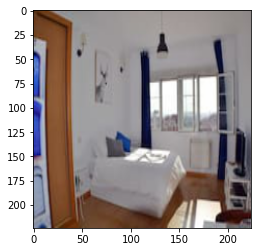

In [6]:
#Comprobamos que las imagenes se haya cargado correctamente
index = 0
plt.imshow(loaded_images[index])


In [26]:
#Cargamos la información del csv con los datos de airbnb
import pandas as pd
airbnb_data = pd.read_csv('airbnb-listings.csv', sep = ';')
airbnb_data.head(10)

ID  ...                                           Features
0  15141125  ...  Host Is Superhost,Host Has Profile Pic,Host Id...
1   9470166  ...  Host Has Profile Pic,Host Identity Verified,Re...
2  17444981  ...  Host Has Profile Pic,Host Identity Verified,Re...
3   3284565  ...  Host Has Profile Pic,Host Identity Verified,Is...
4    499911  ...  Host Is Superhost,Host Has Profile Pic,Host Id...
5   1346747  ...  Host Has Profile Pic,Is Location Exact,Require...
6   3097553  ...  Host Has Profile Pic,Host Identity Verified,Re...
7  13440784  ...  Host Has Profile Pic,Is Location Exact,Require...
8   7818234  ...  Host Has Profile Pic,Host Identity Verified,Is...
9   1386096  ...  Host Has Profile Pic,Host Identity Verified,Is...

[10 rows x 89 columns]

# Match de la información númerica y las imagenes

Está parte ya se haría siempre. Nos vamos a quedar solo con aquellos apartamentos que tienen imagen. 

Vamos a ir cargando las librerías según vayan siendo necesarias. Mejor práctica sería juntarlas todas en la parte superior, pero como el notebook por temas computacionales se ha ido ejecutando poco a poco, por si al mover algo deja de funcionar lo voy a mantener así.

In [27]:
#Cargamos las librerias de la sección 2 por si no hemos ejecutado la sección 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline 


In [28]:
print(loaded_images.shape)

(14001, 224, 224, 3)


In [29]:
#Filtramos los datos por los apartamentos con imagen
data_with_imgs = airbnb_data[was_loaded == 1]

In [30]:
data_with_imgs.shape

(11251, 89)

Hemos pasado de 14001 apartamentos a 11251 que son aquellos de los que se dispone de imagen

# Procesamiento de la base de datos

Antes de empezar, vamos a eliminar todas las variables que identifiquen un apartamento,anuncio, o al anunciante ya que no aportaran nada. También aquellas que puedan ser url de imagenes, ya que hemos extraido ya la imagenes que usaremos para el modelo. Es decir ID,Listing Url,Scrape ID, Last Scraped,Medium Url,Picture Url, XL Picture Url,Host ID, Host URL, Host Name,Host Thumbnail Url, Host Picture Url,Thumbnail Url

Eliminamos la variable Thumbnail Url que es la variable que hemos usado para la extracción de las imagenes pero como ya tenemos las imagenes descargadas ya no haría falta.

In [31]:
data_with_imgs = data_with_imgs.drop(['ID','Listing Url','Scrape ID', 'Last Scraped','Thumbnail Url','Medium Url','Picture Url', 'XL Picture Url','Host ID', 'Host URL', 'Host Name','Host Thumbnail Url', 'Host Picture Url' ], axis=1)

In [32]:
data_with_imgs.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
   

Queremos que test y train tengan las mismas características estadísticas, y por tanto, para hacer train y test tenemos que coger una muestra aleatoria evitando de esta forma posibles sesgos por algún posible evento que haya podido haber.No es necesario estratificar porque no es un problema de clasificación dividimos entre train ( 80%) y test( 20%). Posteriormente usaremos un 10% de train para hacer validación.

In [33]:
#Dividimos entre test y train
from sklearn.model_selection import train_test_split
y1 = data_with_imgs['Price']
X1 = data_with_imgs.drop(['Price'],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, shuffle = True, random_state = 0)

count    8996.000000
mean       65.649956
std        61.799339
min         9.000000
25%        30.000000
50%        50.000000
75%        80.000000
max       850.000000
Name: Price, dtype: float64


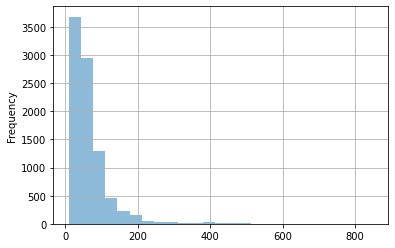

In [34]:
#Análisis de la variable objetivo Price
print(y_train.describe().T)
y_train.plot.hist(alpha=0.5, bins=25, grid = True)
plt.show()

Vemos como la variable Price es asimétrica, para que tenga una distribución más parecida a la normal, la vamos a transformar en logaritmo.

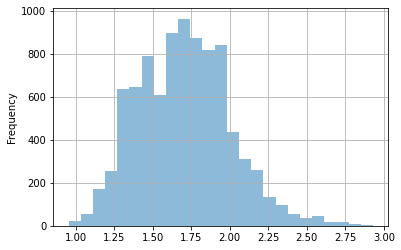

In [35]:
#Hacemos una transformación logaritmica para ver si la distribución se aproxima más a la normal
y_train_log = np.log10(y_train)
y_train_log.plot.hist(alpha=0.5, bins=25, grid = True)
plt.show()

In [36]:
#Dada la distribución vamos a usar como variable objetivo el logaritmo del precio
y_train = np.log10(y_train)

Antes de hacer un análisis exploratorio, con el fin de de reducir el número de variables empiezo viendo que variables categóricas puedo eliminar y cómo codificarlas.

## Tratamiento de variables categóricas 

In [37]:
X_train.describe(exclude=[np.number]).T  

count  ...  freq
Name                          9000  ...     8
Summary                       8711  ...    43
Space                         6644  ...    24
Description                   8995  ...    17
Experiences Offered           9000  ...  9000
Neighborhood Overview         5720  ...    26
Notes                         3513  ...    38
Transit                       5715  ...    23
Access                        5251  ...    31
Interaction                   5205  ...    42
House Rules                   5896  ...    36
Host Since                    8997  ...   129
Host Location                 8970  ...  6070
Host About                    5707  ...   117
Host Response Time            7901  ...  5304
Host Neighbourhood            6625  ...   639
Host Verifications            8998  ...  2111
Street                        9000  ...   336
Neighbourhood                 5781  ...   572
Neighbourhood Cleansed        9000  ...  1097
Neighbourhood Group Cleansed  8857  ...  4140
City                          8995  ...  8551
State                         8966  ...  6999
Zipcode                       8695  ...  1168
Market                        8961  ...  8600
Smart Location                9000  ...  8542
Country Code                  9000  ...  9000
Country                       9000  ...  9000
Property Type                 9000  ...  7276
Room Type                     9000  ...  5005
Bed Type                      9000  ...  8813
Amenities                     8903  ...    25
Calendar Updated              9000  ...  2390
Calendar last Scraped         9000  ...  6422
First Review                  7124  ...    46
Last Review                   7124  ...   538
License                        243  ...     4
Cancellation Policy           9000  ...  3430
Geolocation                   9000  ...     1
Features                      9000  ...  1448

[40 rows x 4 columns]

Vamos a eliminar aquellas variables que son de texto libre, y no podemos sacar información fácilmente sin usar NLP. De alguna de ellas lo que haremos, será crear nuevas variables para identificar si tienen wifi, parking, o si están cerca del metro, etc.
Eliminamos aquellas variables que son repetitivas por ejemplo país y código pais.

In [38]:
X_train = X_train.drop(['Name', 'Summary', 'Space', 'Description','Neighborhood Overview','Access','Notes','Interaction','House Rules','Host Location','Host About','Host Acceptance Rate',
'Host Neighbourhood','Host Verifications','Neighbourhood Cleansed','Street','Smart Location','Country Code','Calendar Updated',
'Has Availability','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Geolocation','Features','Neighbourhood Group Cleansed'],axis= 1)

Categorizamos las variables categóricas interesantes.

Cancellation Policy: En primer lugar agrupamos, ya que hay categorías como flexible_new que incluiremos dentro de flexible.

In [39]:
X_train['Cancellation Policy'].loc[X_train['Cancellation Policy']=='flexible_new']='flexible'
X_train['Cancellation Policy'].loc[X_train['Cancellation Policy']=='moderate_new']='moderate'
X_train['Cancellation Policy'].loc[X_train['Cancellation Policy']=='strict_new']='strict'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


En este caso para codificarla,voy a usar OrdinalEncoder, para poder fijar el orden de la codificación, ya que para este caso existe un orden lógico de menos a más restricción en la política de cancelación.

In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder_cancellation_policy = OrdinalEncoder(categories=[['flexible','moderate','strict','super_strict_30', 'super_strict_60']])

# Ajustamos el codificador de la variable cancellation
encoder_cancellation_policy.fit(X_train[['Cancellation Policy']])
X_train['Cancellation Policy'] = encoder_cancellation_policy.transform(X_train[['Cancellation Policy']])

Bed type: En este caso tal vez no es tan claro, pero voy a usar también OrdinalEncoder, y ordeno de menos cómodo a más cómodo.

In [41]:
encoder_Bed_Type = OrdinalEncoder(categories=[['Airbed','Couch','Pull-out Sofa','Futon', 'Real Bed']])

# Ajustamos el codificador de la variable bed type
encoder_Bed_Type .fit(X_train[['Bed Type']])
X_train['Bed Type'] = encoder_Bed_Type .transform(X_train[['Bed Type']])

Room Type: mismo método de codificación, en este caso de menos a más intimidad.

In [42]:
encoder_room_type = OrdinalEncoder(categories=[['Shared room','Private room','Entire home/apt']])

# Ajustamos el codificador de la variable cancellation
encoder_room_type.fit(X_train[['Room Type']])
X_train['Room Type'] = encoder_room_type.transform(X_train[['Room Type']])

Host Response Time: Lo codificamos de menos a más tiempo en responder.

In [43]:

X_train['Host Response Time']= X_train['Host Response Time'].fillna("NULO")
encoder_host_response_time = OrdinalEncoder(categories=[["within an hour", "within a few hours", 
                                      "within a day", "a few days or more","NULO"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder_host_response_time .fit(X_train[['Host Response Time']])
X_train['Host Response Time'] = encoder_host_response_time.transform(X_train[['Host Response Time']])

Host Senority: La codifico como años de antiguedad del Host.

In [44]:
import datetime
X_train['Host Senority'] = (X_train[['Host Since']].apply(pd.to_datetime))
X_train['Host Senority'] =2017-X_train['Host Senority'].apply(lambda x: x.year)

A partir de la variable Amenities, creo otro conjunto de variables:

    *WIFI: Si hay o no wifi
    *AIR CONDITIONER: Si hay o no aire acondicionado
    *SMOKE: Si se puede o no fumar
    *POOL: Si hay o no piscina
    *PARKING: Si hay o no parking
    *ELEVATOR: Si hay o no ascensor
    *HEAT: Si hay o no calefacción

In [45]:
X_train['WIFI']=((X_train['Amenities'].str.upper().str.contains('WIRELESS'))*1).fillna(0).astype(int)
X_train['Air Conditioner']=((X_train['Amenities'].str.upper().str.contains('AIR'))*1).fillna(0).astype(int)
X_train['SMOKE']=((X_train['Amenities'].str.upper().str.contains('SMOKING ALLOWED'))*1).fillna(0).astype(int)
X_train['POOL']=((X_train['Amenities'].str.upper().str.contains('POOL'))*1).fillna(0).astype(int)
X_train['PARKING']=((X_train['Amenities'].str.upper().str.contains('PARKING'))*1).fillna(0).astype(int)
X_train['ELEVATOR']=((X_train['Amenities'].str.upper().str.contains('ELEVATOR'))*1).fillna(0).astype(int)
X_train['HEAT']=((X_train['Amenities'].str.upper().str.contains('HEAT'))*1).fillna(0).astype(int)
#X_train['HEAT']=(X_train['Amenities'].str.upper().str.contains('HEAT', regex=False)== 'true')*1

Transit: Asumimos que si aparece la palabra metro, indica que está cerca de alguna parada de metro.

In [46]:
X_train['METRO'] = ((X_train['Transit'].str.upper().str.contains('METRO'))*1).fillna(0).astype(int)

Nos quedan menos variables categóricas por codificar.

In [47]:
X_train.describe(exclude=[np.number]).T 

count  ...  freq
Experiences Offered  9000  ...  9000
Transit              5715  ...    23
Host Since           8997  ...   129
Neighbourhood        5781  ...   572
City                 8995  ...  8551
State                8966  ...  6999
Zipcode              8695  ...  1168
Market               8961  ...  8600
Country              9000  ...  9000
Property Type        9000  ...  7276
Amenities            8903  ...    25

[11 rows x 4 columns]

Grafico, para cada variable cualitativa de Experienxes Offered, Property Type y Country, ya que no tienen 
demasiadas categorías. A la hora de trabajar con ellas no siguen un orden lógico como las anteriores, vemos por tanto como se distribuyen por si merece o no la pena pensar como tratarlas.

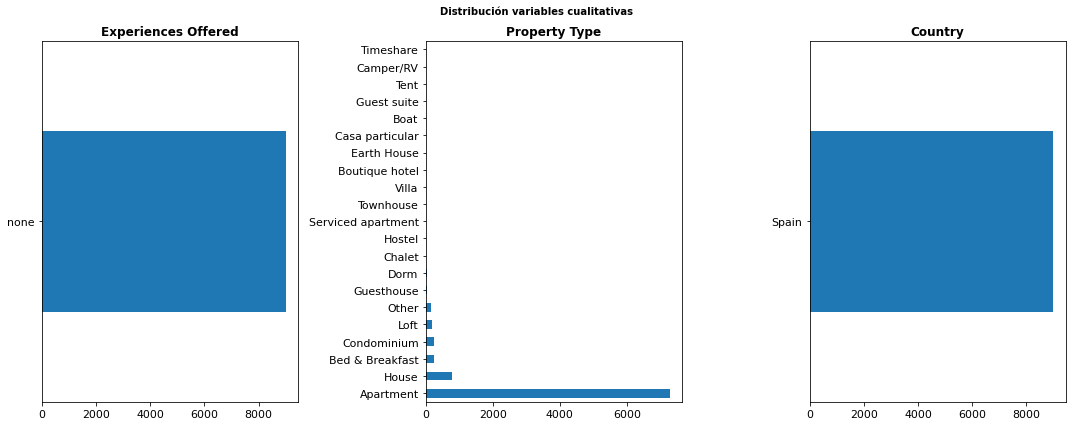

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
axes = axes.flat
columnas_object = X_train.describe(exclude=[np.number]).columns
columnas_object   = ['Experiences Offered','Property Type','Country']

for i, colum in enumerate(columnas_object):
    X_train[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

Experiences Offered directamente la vamos a quitar del dataset, ya que prácticamente todos los apartamentos tienen None

In [49]:
X_train['Experiences Offered'].value_counts().sort_index()

none    9000
Name: Experiences Offered, dtype: int64

Con Property Type pasa más o menos lo menos, el 81% de la muestra son apartamentos, y casi otro 10% son House.

In [50]:
X_train['Property Type'].value_counts().sort_index()/X_train['Property Type'].count()

Apartment             0.808444
Bed & Breakfast       0.029000
Boat                  0.000111
Boutique hotel        0.000444
Camper/RV             0.000111
Casa particular       0.000222
Chalet                0.002000
Condominium           0.026111
Dorm                  0.003000
Earth House           0.000333
Guest suite           0.000111
Guesthouse            0.003444
Hostel                0.001333
House                 0.085556
Loft                  0.019889
Other                 0.016778
Serviced apartment    0.001222
Tent                  0.000111
Timeshare             0.000111
Townhouse             0.000889
Villa                 0.000778
Name: Property Type, dtype: float64

Si no queremos eliminarla, y queremos ver si puede ser relevante o no, podemos categorizar en Apartment, House y otros, para hacer la prueba.

In [51]:
X_train['Property Type'].loc[((X_train['Property Type']=='Apartment') |(X_train['Property Type']=='House') ) ==False] = 'Other' 
encoder_Property_Type = OrdinalEncoder(categories=[["Other", "Apartment", 
                                      "House"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder_Property_Type .fit(X_train[['Property Type']])
X_train['Property Type'] = encoder_Property_Type .transform(X_train[['Property Type']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Nos queda estudiar aquellas que tienen que ver con la localización: Country,Market,State,City,Zipcode,Neighbourhood. Neighbourhood tiene más o menos el 50% del dataset, y zipcode baja demasiado, y muchos de ellos tienen una muestra irrisoria. En cuanto a City, prácticamente el total de la muestra es Madrid, nos vamos a quedar por tanto solo con la muestra de los apartamentos de esta ciudad.

Hemos visto también en los gráficos que todos los apartamentos de la muestra actual son de España,por lo que variables como country parecen no tener sentido. La eliminaremos también.

In [52]:
#Analizamos City por si los apartamentos también están concentrados en una zona concreta
#En este caso vamos a usar Label encoding ya que no tenemos un orden lógico del market
Market_global = X_train['City'].value_counts()
Market_global

Madrid                             8551
Barcelona                           210
马德里                                  40
Palma                                35
Madrid, Comunidad de Madrid, ES      17
                                   ... 
Cala Magrana                          1
Madrid, Vallecas (Fontarrón)          1
Chueca                                1
Illes Balears                         1
Ses Salines                           1
Name: City, Length: 85, dtype: int64

Hay muchas ciudades con pocas muestras, y dado que más del 90% de dataset es Madrid, directamente vamos a analizar los precios en la ciudad de Madrid, y por tanto puede eliminar todas la variables como País, ciudad, Market, etc

In [53]:
X_train = X_train[X_train['City']=='Madrid']

In [54]:
X_train = X_train.drop(['Host Since', 'Amenities','Transit','Experiences Offered','City','Country',
                       'State','Zipcode','Market'],axis = 1)

Solo nos queda como variable categórica Neighbourhood, vamos a probar eliminandola y suponiendo que latitud y longitud recogerá el efecto de la localización.

In [55]:
X_train = X_train.drop(['Neighbourhood'],axis = 1)

## Análisis exploratorio

In [56]:
X_train.describe().T

count         mean  ...          75%            max
Host Response Time              8551.0     0.897322  ...     1.000000       4.000000
Host Response Rate              7515.0    96.042582  ...   100.000000     100.000000
Host Listings Count             8548.0     8.958353  ...     5.000000     207.000000
Host Total Listings Count       8548.0     8.958353  ...     5.000000     207.000000
Latitude                        8551.0    40.420602  ...    40.428356      40.514247
Longitude                       8551.0    -3.696985  ...    -3.693243      -3.575142
Property Type                   8551.0     0.971582  ...     1.000000       2.000000
Room Type                       8551.0     1.531049  ...     2.000000       2.000000
Accommodates                    8551.0     3.066308  ...     4.000000      16.000000
Bathrooms                       8522.0     1.255574  ...     1.000000       8.000000
Bedrooms                        8534.0     1.272557  ...     1.000000      10.000000
Beds                            8520.0     1.929695  ...     2.000000      16.000000
Bed Type                        8551.0     3.958367  ...     4.000000       4.000000
Square Feet                      292.0   340.794521  ...   629.500000    2691.000000
Weekly Price                    2051.0   351.887372  ...   460.000000     980.000000
Monthly Price                   1972.0  1275.134381  ...  1600.000000    6800.000000
Security Deposit                3526.0   178.717811  ...   200.000000     950.000000
Cleaning Fee                    5051.0    27.239359  ...    32.000000     250.000000
Guests Included                 8551.0     1.548708  ...     2.000000      16.000000
Extra People                    8551.0     7.124313  ...    12.000000     271.000000
Minimum Nights                  8551.0     2.421588  ...     3.000000      27.000000
Maximum Nights                  8551.0   895.431762  ...  1125.000000  100000.000000
Availability 30                 8551.0     8.464858  ...    13.000000      30.000000
Availability 60                 8551.0    22.496784  ...    37.000000      60.000000
Availability 90                 8551.0    39.738861  ...    64.000000      90.000000
Availability 365                8551.0   201.428605  ...   318.000000     365.000000
Number of Reviews               8551.0    25.235879  ...    31.000000     446.000000
Review Scores Rating            6751.0    92.097911  ...    98.000000     100.000000
Review Scores Accuracy          6743.0     9.453062  ...    10.000000      10.000000
Review Scores Cleanliness       6746.0     9.372517  ...    10.000000      10.000000
Review Scores Checkin           6738.0     9.658504  ...    10.000000      10.000000
Review Scores Communication     6746.0     9.676697  ...    10.000000      10.000000
Review Scores Location          6736.0     9.543795  ...    10.000000      10.000000
Review Scores Value             6734.0     9.260321  ...    10.000000      10.000000
Cancellation Policy             8551.0     1.045960  ...     2.000000       4.000000
Calculated host listings count  8551.0     6.945153  ...     4.000000     145.000000
Reviews per Month               6825.0     2.143982  ...     3.150000      17.210000
Host Senority                   8548.0     2.595227  ...     4.000000       8.000000
WIFI                            8551.0     0.958250  ...     1.000000       1.000000
Air Conditioner                 8551.0     0.755467  ...     1.000000       1.000000
SMOKE                           8551.0     0.260437  ...     1.000000       1.000000
POOL                            8551.0     0.046661  ...     0.000000       1.000000
PARKING                         8551.0     0.076950  ...     0.000000       1.000000
ELEVATOR                        8551.0     0.604140  ...     1.000000       1.000000
HEAT                            8551.0     0.906561  ...     1.000000       1.000000
METRO                           8551.0     0.521576  ...     1.000000       1.000000

[46 rows x 8 columns]

Vemos muchos NA para Cleaning Fee y Security Deposit, en esos casos parece que cuando es NA es que no hay ese tipo de fees, entonces vamos a rellenar con ceros.

In [57]:

X_train['Cleaning Fee']=X_train['Cleaning Fee'].fillna(0)
X_train['Security Deposit'] = X_train['Cleaning Fee'].fillna(0)


Vamos a ver cuántos valores nulos hay por variable, y cuando tengamos más del 10% de valores nulos, vamos a eliminar la columna.

In [58]:
X_train.isnull().sum(axis = 0)/X_train.shape[0]

Host Response Time                0.000000
Host Response Rate                0.121155
Host Listings Count               0.000351
Host Total Listings Count         0.000351
Latitude                          0.000000
Longitude                         0.000000
Property Type                     0.000000
Room Type                         0.000000
Accommodates                      0.000000
Bathrooms                         0.003391
Bedrooms                          0.001988
Beds                              0.003625
Bed Type                          0.000000
Square Feet                       0.965852
Weekly Price                      0.760145
Monthly Price                     0.769384
Security Deposit                  0.000000
Cleaning Fee                      0.000000
Guests Included                   0.000000
Extra People                      0.000000
Minimum Nights                    0.000000
Maximum Nights                    0.000000
Availability 30                   0.000000
Availabilit

Square Feet tiene valor solo un 4% de la muestra de train, a pesar de ser una variable relevante, vamos a optar por eliminarla, podríamos hacer un modelo para dotar de valor los valores nulos, pero lo crearíamos a partir del mismo dataset, por lo que tendría correlación con otras variables y es probable que de cara al alquiler vacacional más que la superficie, la variable clave pueda ser el número de personas que puede acoger el apartamento.

Eliminamos el resto de variables con un porcentaje elevado de valores nulos.

In [59]:
X_train = X_train.drop(['Host Response Rate' ,'Square Feet','Review Scores Rating','Review Scores Accuracy',
                       'Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
                       'Review Scores Location','Reviews per Month',
                       'Weekly Price','Monthly Price','Review Scores Value'],axis= 1)

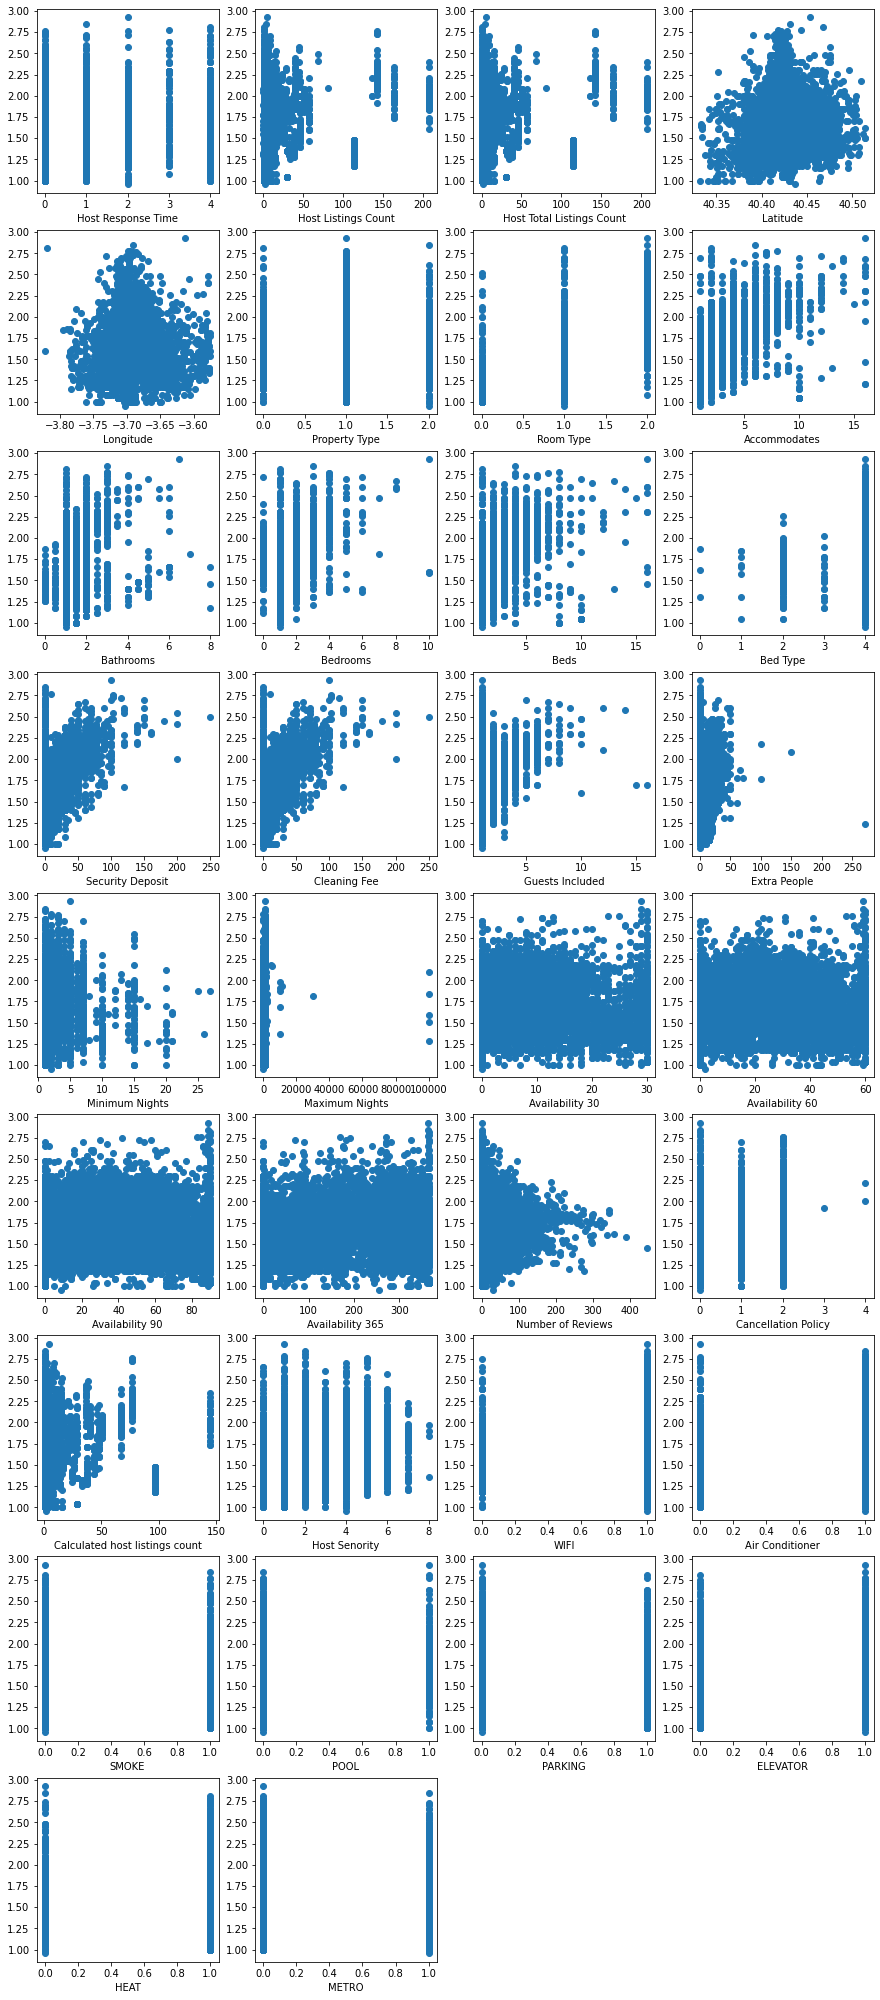

In [60]:
#Vamos a hacer scatter plot para ver si hay evidentes outliers:
scatter= pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True)
plt.figure(figsize=(15, 40))

c = 1
for d in X_train.describe().columns:

    plt.subplot(10,4,c)
    plt.scatter(scatter[d],scatter['Price'])

    plt.xlabel(d)
    c= c+1
    
plt.show()

En los gráficos anteriores podemos ver varias cosas. Por un lado, las variables Minimum night y maximum night tienen valores raros, por lo tanto vamos a considerar que existen outliers.También en la variable Extra people podemos ver valores anómalos.

Por otro lado, vemos como hay variables que tienen un comportamiento practicamente igual, por ejemplo, Host listing count y Host total listing count.

Otras variables parecidas son Security deposit y cleaning fee.

In [61]:
#Minimunn Nigths y Maximun Nights parece que tiene outliers
#Eliminamos si Minimum Nights >400 y si Maximum Nights > 15000
print("Número de outlier eliminado de Minimun Night: " + str(len(X_train['Minimum Nights'].loc[(X_train['Minimum Nights'] > 400)])))
X_train['Minimum Nights']=X_train['Minimum Nights'].mask(X_train['Minimum Nights'] > 400)

print("Número de outlier eliminado de Maximun Night: " + str(len(X_train['Maximum Nights'].loc[(X_train['Maximum Nights'] > 15000)])))
X_train['Maximum Nights']=X_train['Maximum Nights'].mask(X_train['Maximum Nights'] > 15000)


#Extra people parece que también tiene ouliers
print("Número de outlier eliminado de Extra People Price: " + str(len(X_train['Extra People'].loc[(X_train['Extra People'] > 150)])))
X_train['Extra People']=X_train['Extra People'].mask(X_train['Extra People'] > 150)

Número de outlier eliminado de Minimun Night: 0
Número de outlier eliminado de Maximun Night: 6
Número de outlier eliminado de Extra People Price: 1


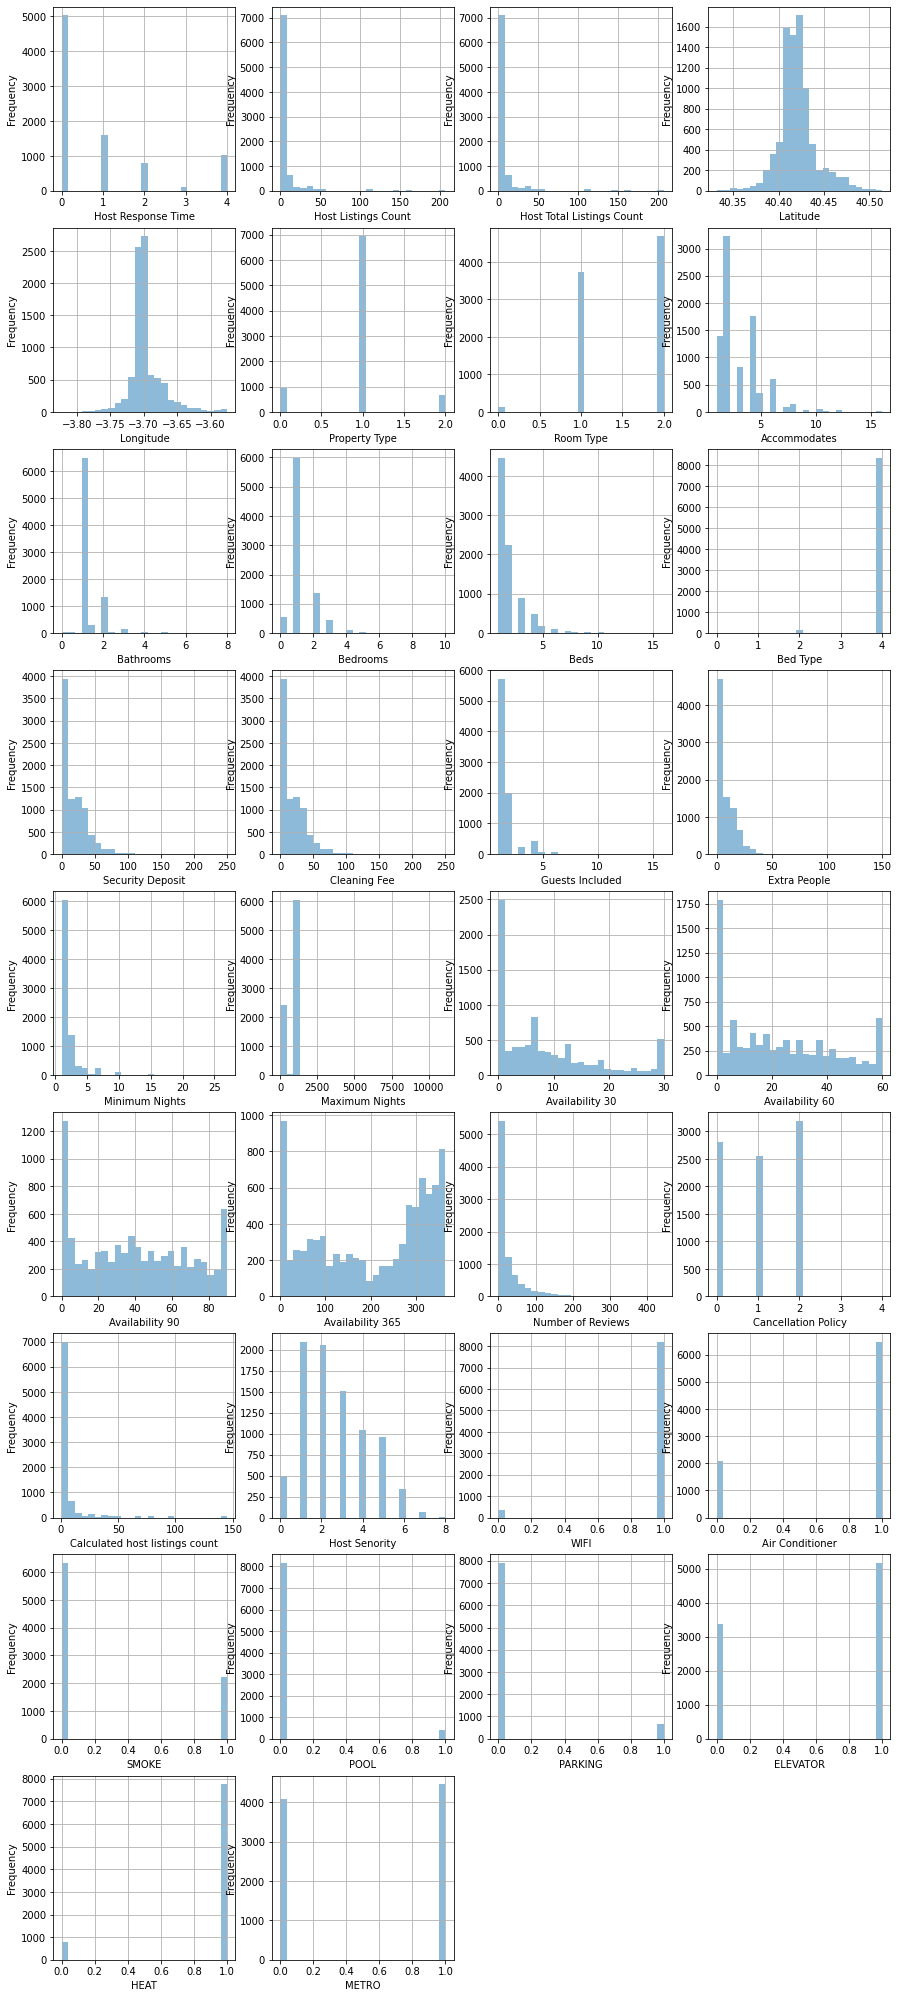

In [62]:
# Histogramas
plt.figure(figsize=(15, 40))

c = 1
for d in X_train.describe().columns:

    plt.subplot(10,4,c)   
    X_train[d].plot.hist(alpha=0.5, bins=25, grid = True)
    plt.xlabel(d)
    c= c+1
    
plt.show()

Creamos además las siguientes variables para medir si hay demasiadas habitaciones en un apartamento o si meten demasiadas personas por apartamento.

In [63]:
X_train['Bath/Bedrooms'] = X_train['Bathrooms']*X_train['Bedrooms']
X_train['Accommodates/Bedrooms'] = X_train['Accommodates']*X_train['Bedrooms']

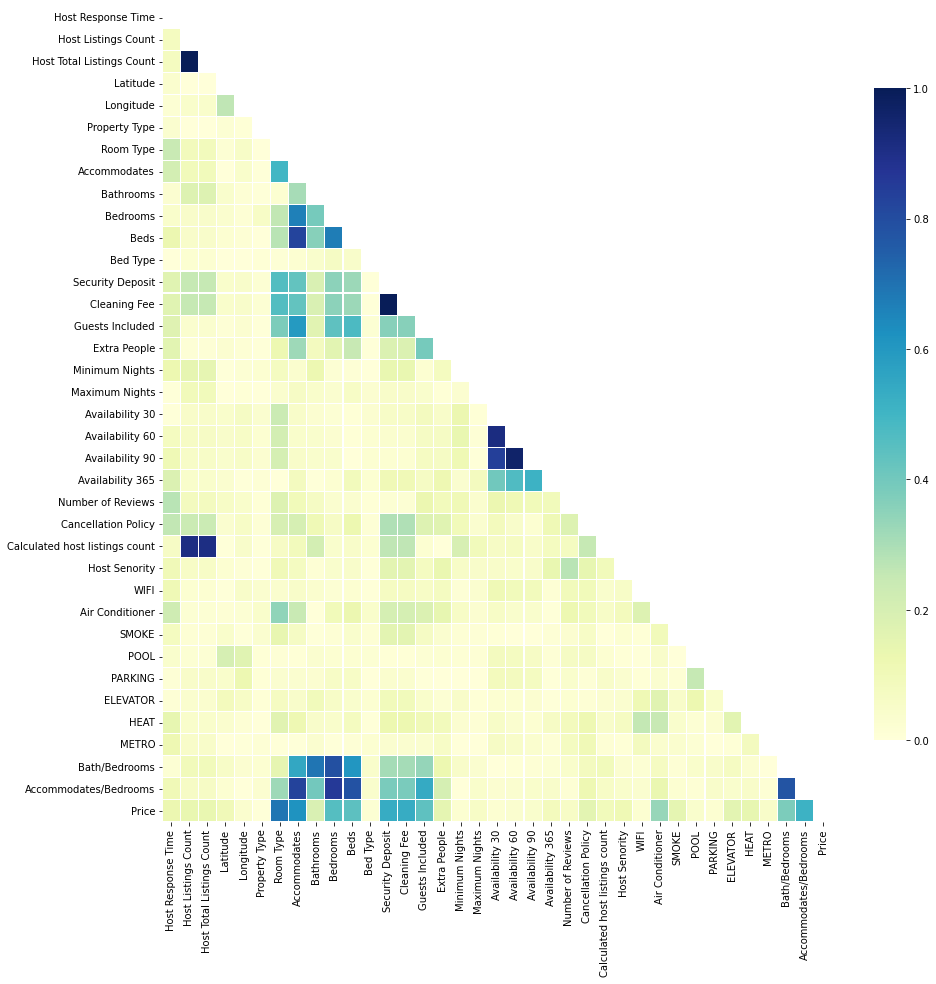

In [64]:
#Matriz de correlación
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Ya veíamos en los histogramas que Host Listings Count y Host Total Listings Count parecían iguales. En la matriz de correlaciones, podemos ver que la correlación entre ellas es prácticamente 1. También vemos el mismo resultado  con Calculated host listings coun. Eliminamos dos de ellas.

In [65]:
X_train = X_train.drop(['Host Total Listings Count','Host Listings Count'],axis= 1)

Availability 60 Availability 90, tienen una correlación también muy alta, eliminamos una de ellas

In [66]:
X_train = X_train.drop(['Availability 90','Availability 60'],axis= 1)

Eliminamos también Beds que está muy correlacionado con Accommodates

In [67]:
X_train = X_train.drop(['Beds'],axis= 1)

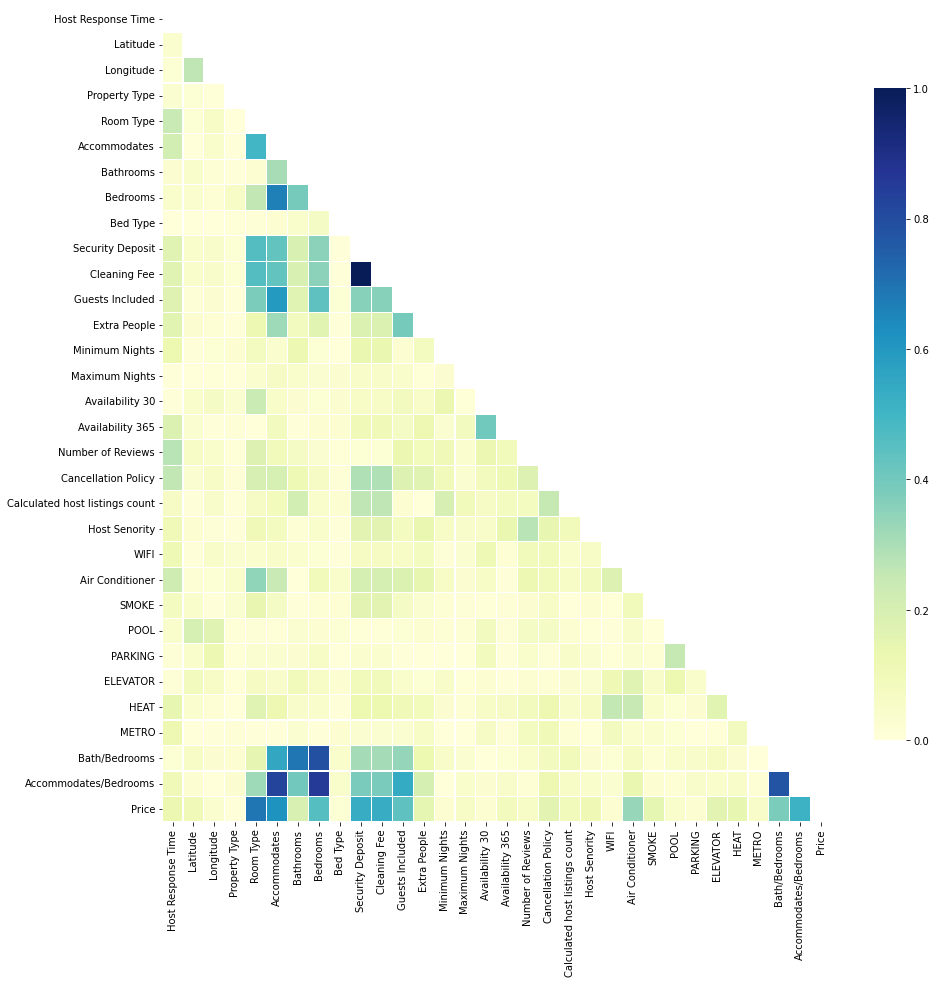

In [68]:
#Repetimos la matriz de correlación
corr = np.abs(pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Security Deposit y Cleaning Fee tienen mucha correlación a pesar de que por definición no parece que tengan relacion, tal vez por que cuando no hay de Security Deposit tampoco hay Cleaning Fee, la vamos a mantener de momento.

También vemos mucha correlación entre Accommodares/Bedrooms y Accomodates, ya que la hemos creado como ratio de la misma, y ocurre lo mismo con Bedrooms, y con la otra variable que hemos creado Bath/Bedrooms, las vamos a mantener también por el momento.

In [ ]:
#Eliminamos las filas con NAN

In [69]:
Data = pd.merge(X_train,pd.DataFrame(y_train), left_index=True, right_index=True)
Data = Data.dropna()
y_train = Data['Price']
X_train = Data.drop(['Price'],axis = 1)

## Aplicación de transformaciones en test

In [70]:
y_test = np.log10(y_test)

X_test= X_test.drop(['Name', 'Summary', 'Space', 'Description','Neighborhood Overview','Access','Notes','Interaction','House Rules','Host Location','Host About','Host Acceptance Rate',
'Host Neighbourhood','Host Verifications','Neighbourhood Cleansed','Street','Smart Location','Country Code','Calendar Updated',
'Has Availability','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Geolocation','Features'],axis= 1)

X_test['Cancellation Policy'].loc[X_test['Cancellation Policy']=='flexible_new']='flexible'
X_test['Cancellation Policy'].loc[X_test['Cancellation Policy']=='moderate_new']='moderate'
X_test['Cancellation Policy'].loc[X_test['Cancellation Policy']=='strict_new']='strict'
X_test['Cancellation Policy'] = encoder_cancellation_policy.transform(X_test[['Cancellation Policy']])

X_test['Bed Type'] = encoder_Bed_Type .transform(X_test[['Bed Type']])
X_test['Room Type'] = encoder_room_type.transform(X_test[['Room Type']])


X_test['WIFI']=((X_test['Amenities'].str.upper().str.contains('WIRELESS'))*1).fillna(0).astype(int)
X_test['Air Conditioner']=((X_test['Amenities'].str.upper().str.contains('AIR'))*1).fillna(0).astype(int)
X_test['SMOKE']=((X_test['Amenities'].str.upper().str.contains('SMOKING ALLOWED'))*1).fillna(0).astype(int)
X_test['POOL']=((X_test['Amenities'].str.upper().str.contains('POOL'))*1).fillna(0).astype(int)
X_test['PARKING']=((X_test['Amenities'].str.upper().str.contains('PARKING'))*1).fillna(0).astype(int)
X_test['ELEVATOR']=((X_test['Amenities'].str.upper().str.contains('ELEVATOR'))*1).fillna(0).astype(int)
X_test['HEAT']=((X_test['Amenities'].str.upper().str.contains('HEAT'))*1).fillna(0).astype(int)
#X_train['HEAT']=(X_train['Amenities'].str.upper().str.contains('HEAT', regex=False)== 'true')*1
X_test['METRO'] = ((X_test['Transit'].str.upper().str.contains('METRO'))*1).fillna(0).astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [71]:
X_test['Host Response Time']= X_test['Host Response Time'].fillna("NULO")
X_test['Host Response Time'] = encoder_host_response_time.transform(X_test[['Host Response Time']])
X_test['Host Senority'] = (X_test[['Host Since']].apply(pd.to_datetime))
X_test['Host Senority'] =2017-X_test['Host Senority'].apply(lambda x: x.year)

X_test['Property Type'].loc[((X_test['Property Type']=='Apartment') |(X_test['Property Type']=='House') ) ==False] = 'Other' 
X_test['Property Type'] = encoder_Property_Type .transform(X_test[['Property Type']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [72]:
X_test = X_test[X_test['City']=='Madrid']

In [73]:
X_test = X_test.drop(['Neighbourhood Group Cleansed'],axis=1)

In [74]:
X_test = X_test.drop(['Host Since', 'Amenities','Transit','Experiences Offered','Neighbourhood','City','Country',
                       'State','Zipcode','Market'],axis = 1)

X_test['Cleaning Fee']=X_test['Cleaning Fee'].fillna(0)
X_test['Security Deposit'] = X_test['Cleaning Fee'].fillna(0)
X_test = X_test.drop(['Host Response Rate' ,'Square Feet','Review Scores Rating','Review Scores Accuracy',
                       'Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
                       'Review Scores Location','Reviews per Month',
                       'Weekly Price','Monthly Price','Review Scores Value'],axis= 1)

X_test['Extra People']=X_test['Extra People'].mask(X_test['Extra People'] > 150)
X_test['Minimum Nights']=X_test['Minimum Nights'].mask(X_test['Minimum Nights'] > 400)
X_test['Maximum Nights']=X_test['Maximum Nights'].mask(X_test['Maximum Nights'] > 15000)



X_test['Bath/Bedrooms'] = X_test['Bathrooms']*X_test['Bedrooms']
X_test['Accommodates/Bedrooms'] = X_test['Accommodates']*X_test['Bedrooms']

X_test = X_test.drop(['Host Total Listings Count','Host Listings Count'],axis= 1)

X_test = X_test.drop(['Availability 90','Availability 60'],axis= 1)
X_test = X_test.drop(['Beds'],axis= 1)

In [75]:
X_test.shape[0]

2140

In [76]:
Data = pd.merge(X_test,pd.DataFrame(y_test), left_index=True, right_index=True)
Data = Data.dropna()
y_test = Data['Price']
X_test = Data.drop(['Price'],axis = 1)

In [77]:
X_test.shape[0]

2128

## Selección de características

Voy a estudiar la selección de características usando Lasso por si hay alguna variable que podemos eliminar por no ser relevante.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................alpha=0.00018329807108324357; total time=   0.0s
[CV] END .......................alpha=0.00018329807108324357; total time=   0.0s
[CV] END .......................alpha=0.00018329807108324357; total time=   0.1s
[CV] END .......................alpha=0.00018329807108324357; total time=   0.1s
[CV] END .......................alpha=0.00018329807108324357; total time=   0.0s
[CV] END ........................alpha=0.0003359818286283781; total time=   0.0s
[CV] END ........................alpha=0.000335

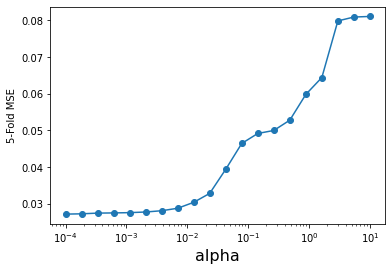

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-4,1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5,verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

Vemos que alpha converge a cero, entonces nos quedamos con el punto donde empieza a converger,0.0001, porque si tomamos cero nos quedamos con todas las variables.

In [79]:
from sklearn.metrics import mean_squared_error
feature_names = X_train.columns

alpha_optimo = 0.0001
#alpha_optimo = grid.best_params_['alpha']

lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.0268
MSE Modelo Lasso (test) : 0.0424
RMSE Modelo Lasso (train): 0.164
RMSE Modelo Lasso (test) : 0.206
Host Response Time 0.01596923881295569
Latitude 0.6361708664553849
Longitude -0.0987677120893346
Property Type -0.011016073864426306
Room Type 0.2663605222320903
Accommodates 0.03494741252083688
Bathrooms 0.02805421061980569
Bedrooms 0.0347399219425374
Bed Type 0.010966879512231078
Security Deposit 0.002110127482435279
Cleaning Fee 1.4653277611515592e-18
Guests Included 0.011210824679134947
Extra People -0.001654425824359245
Minimum Nights -0.004447891956260156
Maximum Nights 8.114693272086545e-06
Availability 30 0.0035533179889461934
Availability 365 3.611516520727591e-05
Number of Reviews -0.0001518833270654112
Cancellation Policy -0.004188542347409224
Calculated host listings count 1.2442441991739238e-05
Host Senority 0.004818489728437129
WIFI -0.014802831031445994
Air Conditioner 0.05278929575218458
SMOKE -0.02219066023956428
POOL 0.025710651397233934


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [80]:
mseTrainModelLasso = mean_squared_error(10**y_train,10**ytrainLasso)
mseTestModelLasso = mean_squared_error(10**y_test,10**ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (train): 1.2e+03
MSE Modelo Lasso (test) : 1.96e+03
RMSE Modelo Lasso (train): 34.7
RMSE Modelo Lasso (test) : 44.3


Con lasso vemos que prácticamente no eliminamos ninguna variable, solo Cleaning Fee,Maximum Nights,Availability 365  y Calculated host listings count.

In [81]:
Lasso_features = X_train.columns
Lasso_features=Lasso_features.drop(['Cleaning Fee','Maximum Nights','Availability 365','Calculated host listings count'])

# Numerical and Categorical data

La aplicación de los modelos la voy a llevar a cabo por fases. En primer lugar, vamos a tratar de estimar el precio de los apartamentos solo con la información númerica, posteriormente solo con las imagenes, y ya por último mediante un modelo combinado. Lo hago así, porque quiero ver como se comporta cada modelo, y que ocurre cuando cambio ciertos parámetros, y de esta forma, puedo aislar algo mejor los efectos.

En primer lugar voy a normalizar/estandarizar las variables. Voy a usar MinMaxScaler para ello,haciendo un escalado min-max de cada columna de características

In [82]:
from sklearn.preprocessing import MinMaxScaler
cs = MinMaxScaler()

La variable Price está en logaritmos, ya tiene una distribución bastante simetrica, por lo que no la voy a transformar.

In [ ]:
y_train

461      1.000000
13796    1.845098
3542     1.477121
5113     1.518514
10902    1.342423
           ...   
6049     1.477121
4072     2.255273
12307    1.845098
13456    1.278754
3429     1.176091
Name: Price, Length: 8492, dtype: float64

In [83]:
	#Normalizamos los datos
	X_train_transform= cs.fit_transform(X_train[Lasso_features])
	X_test_transform = cs.transform(X_test[Lasso_features])
 	#y_train_transform = cs.fit_transform(y_train)
	#y_test_transform = cs.transform(y_test)

Voy a hacer una primera prueba usando solo la parte numérica y categórica para hacer la estimación del precio, sin tener en cuenta las imagenes.

In [84]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization,Conv2D, MaxPooling2D,Activation,Dropout,Dense,Flatten,Input,experimental

In [85]:
from tensorflow.keras.optimizers import Adam


Voy a coger una muestra aleatoria del 10% del train para hacer validación de los modelos.


In [86]:
X_train_transform_train, X_train_transform_validation, y_train_transform_train, y_train_transform_validation = train_test_split(	X_train_transform, y_train, test_size = 0.1, shuffle = True, random_state = 0)

Voy a crear 2 modelos FC uno con dos capas más la de salida, y otro con 3 capas más la de salida, pudiendo variar el número de neuronas por capa y las funciones de activación.
Como es un análisis de regresión la última capa será lineal.

In [ ]:
def create_mlp2(dim,neuronas,activacion,regress = False):

  model = Sequential()
  model.add(Dense(neuronas[0], input_dim=dim, activation=activacion[0]))
  model.add(Dense(neuronas[1], activation=activacion[1]))
  if regress:
    model.add(Dense(1, activation="linear"))
  
  return model

In [ ]:
def create_mlp3(dim,neuronas,activacion,regress = False):

  model = Sequential()
  model.add(Dense(neuronas[0], input_dim=dim, activation=activacion[0]))
  model.add(Dense(neuronas[1], activation=activacion[1]))
  model.add(Dense(neuronas[2], activation=activacion[2]))
  if regress:
    model.add(Dense(1, activation="linear"))
  
  return model

In [ ]:
#Primera prueba: modelo con 2 capas, con 8 y 4 neuronas por capa, utilizando como función de activación relu.
#Además como optimizador se usa Adam.
neuronas = [8,4]
activacion = ["relu","relu"]
model1 = create_mlp2(X_train_transform.shape[1],neuronas,activacion,regress=True)
opt = Adam (lr=1e-3,decay=1e-3/200)
model1.compile(loss="mean_absolute_percentage_error",optimizer=opt)
print("[INFO] training model...")
model1.fit(X_train_transform_train,y_train_transform_train,validation_data=(X_train_transform_validation,y_train_transform_validation),epochs=300,batch_size=8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/300
956/956 [==============================] - 2s 2ms/step - loss: 11.6365 - val_loss: 8.0350
Epoch 2/300
956/956 [==============================] - 1s 1ms/step - loss: 7.9839 - val_loss: 7.5493
Epoch 3/300
956/956 [==============================] - 1s 1ms/step - loss: 7.6713 - val_loss: 7.2233
Epoch 4/300
956/956 [==============================] - 1s 1ms/step - loss: 7.5557 - val_loss: 7.1923
Epoch 5/300
956/956 [==============================] - 1s 1ms/step - loss: 7.5833 - val_loss: 7.0967
Epoch 6/300
956/956 [==============================] - 1s 1ms/step - loss: 7.5029 - val_loss: 7.1510
Epoch 7/300
956/956 [==============================] - 1s 2ms/step - loss: 7.4465 - val_loss: 8.0547
Epoch 8/300
956/956 [==============================] - 1s 1ms/step - loss: 7.4678 - val_loss: 7.0693
Epoch 9/300
956/956 [==============================] - 1s 2ms/step - loss: 7.4519 - val_loss: 7.0888
Epoch 10/300
956/956 [==============================] - 1s 2ms/st

In [ ]:
print("Evaluación del modelo en train")
model1.evaluate(X_train_transform_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
model1.evaluate(X_train_transform_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
model1.evaluate(X_test_transform,y_test)

Evaluación del modelo en train
239/239 [==============================] - 0s 1ms/step - loss: 6.4772
Evaluación del modelo en validacion
27/27 [==============================] - 0s 1ms/step - loss: 6.5650
Evaluación del modelo en test
67/67 [==============================] - 0s 1ms/step - loss: 6.7423


6.742293357849121

Es un modelo sencillo que no parece que tenga overfitting, ya que los resultados de validación no se alejan demasiado a los resultados de train. Podemos ver como el error cuadrático medio es "similar"

In [ ]:
#Evaluamos el modelo
print("[INFO] del error...")

mseTrain = mean_squared_error(10**y_train_transform_train,10**model1.predict(X_train_transform_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model1.predict(X_train_transform_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**model1.predict(X_test_transform ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))


[INFO] del error...
RMSE Modelo (train): 32.5
RMSE Modelo (train_validation): 37.2
RMSE Modelo (test) : 33.6


In [ ]:
#Voy a aumentar el número de neuronas por capa
neuronas = [16,20]
activacion = ["relu","relu"]
model2 = create_mlp2(X_train_transform.shape[1],neuronas,activacion,regress=True)
opt = Adam (lr=1e-3,decay=1e-3/200)
model2.compile(loss="mean_absolute_percentage_error",optimizer=opt)
print("[INFO] training model...")
model2.fit(X_train_transform_train,y_train_transform_train,validation_data=(X_train_transform_validation,y_train_transform_validation),epochs=300,batch_size=8)

[INFO] training model...
Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


956/956 [==============================] - 2s 2ms/step - loss: 14.2667 - val_loss: 7.3936
Epoch 2/300
956/956 [==============================] - 2s 2ms/step - loss: 7.7811 - val_loss: 7.2733
Epoch 3/300
956/956 [==============================] - 2s 2ms/step - loss: 7.6120 - val_loss: 7.3485
Epoch 4/300
956/956 [==============================] - 2s 2ms/step - loss: 7.5363 - val_loss: 7.1002
Epoch 5/300
956/956 [==============================] - 2s 2ms/step - loss: 7.5639 - val_loss: 7.2293
Epoch 6/300
956/956 [==============================] - 2s 2ms/step - loss: 7.5259 - val_loss: 7.6441
Epoch 7/300
956/956 [==============================] - 2s 2ms/step - loss: 7.4605 - val_loss: 7.0956
Epoch 8/300
956/956 [==============================] - 1s 2ms/step - loss: 7.4012 - val_loss: 6.9997
Epoch 9/300
956/956 [==============================] - 2s 2ms/step - loss: 7.3848 - val_loss: 6.9955
Epoch 10/300
956/956 [==============================] - 2s 2ms/step - loss: 7.2770 - val_loss: 6.9170


Vemos que el modelo mejora ligeramente con respecto al modelo previo, y el error cuadrático medio se acerca más entre train y validación, resultado deseable en la estimación de los modelos.

In [ ]:
print("Evaluación del modelo en train")
model2.evaluate(X_train_transform_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
model2.evaluate(X_train_transform_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
model2.evaluate(X_test_transform,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**model2.predict(X_train_transform_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model2.predict(X_train_transform_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**model2.predict(X_test_transform ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))




Evaluación del modelo en train
239/239 [==============================] - 0s 1ms/step - loss: 5.5668
Evaluación del modelo en validacion
27/27 [==============================] - 0s 1ms/step - loss: 6.2112
Evaluación del modelo en test
67/67 [==============================] - 0s 1ms/step - loss: 6.6897
RMSE Modelo (train): 31
RMSE Modelo (train_validation): 33.9
RMSE Modelo (test) : 31


Vamos a ver que pasa si añado una capa más de neuronas. Y mantengo un número elevado de neuronas por capa

In [ ]:
neuronas = [30,25,10]
activacion = ["relu","relu","relu"]
model3 = create_mlp3(X_train_transform.shape[1],neuronas,activacion,regress=True)
opt = Adam (lr=1e-3,decay=1e-3/200)
model3.compile(loss="mean_absolute_percentage_error",optimizer=opt)
print("[INFO] training model...")
model3.fit(X_train_transform_train,y_train_transform_train,validation_data=(X_train_transform_validation,y_train_transform_validation),epochs=300,batch_size=8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/300
956/956 [==============================] - 3s 2ms/step - loss: 12.1244 - val_loss: 7.4331
Epoch 2/300
956/956 [==============================] - 2s 2ms/step - loss: 7.8469 - val_loss: 7.2359
Epoch 3/300
956/956 [==============================] - 2s 2ms/step - loss: 7.6414 - val_loss: 7.2186
Epoch 4/300
956/956 [==============================] - 2s 2ms/step - loss: 7.6248 - val_loss: 7.6723
Epoch 5/300
956/956 [==============================] - 2s 2ms/step - loss: 7.5180 - val_loss: 7.8282
Epoch 6/300
956/956 [==============================] - 2s 2ms/step - loss: 7.4727 - val_loss: 6.9781
Epoch 7/300
956/956 [==============================] - 2s 2ms/step - loss: 7.4812 - val_loss: 7.0709
Epoch 8/300
956/956 [==============================] - 2s 2ms/step - loss: 7.4467 - val_loss: 7.0409
Epoch 9/300
956/956 [==============================] - 2s 2ms/step - loss: 7.3587 - val_loss: 7.3387
Epoch 10/300
956/956 [==============================] - 2s 2ms/st

In [ ]:
print("Evaluación del modelo en train")
model3.evaluate(X_train_transform_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
model3.evaluate(X_train_transform_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
model3.evaluate(X_test_transform,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**model3.predict(X_train_transform_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model3.predict(X_train_transform_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**model3.predict(X_test_transform ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 0s 1ms/step - loss: 4.9582
Evaluación del modelo en validacion
27/27 [==============================] - 0s 2ms/step - loss: 6.3104
Evaluación del modelo en test
67/67 [==============================] - 0s 1ms/step - loss: 6.6455
RMSE Modelo (train): 27.7
RMSE Modelo (train_validation): 34.9
RMSE Modelo (test) : 32.7


Vemos como el resultado ha mejorado en train pero en validación o test ha empeorado. Puede ser una evidencia de un posible sobreajuste.

Por tanto, vamos a bajar un poco el número de neuronas por capa, y además voy a estudiar cuál es el efecto de modificar el learning rate y decay del optimizador Adam.

[INFO] training model...
Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


956/956 [==============================] - 2s 2ms/step - loss: 11.7227 - mse: 0.0859 - val_loss: 7.5802 - val_mse: 0.0310
Epoch 2/300
956/956 [==============================] - 2s 2ms/step - loss: 7.8394 - mse: 0.0309 - val_loss: 7.8925 - val_mse: 0.0284
Epoch 3/300
956/956 [==============================] - 2s 2ms/step - loss: 7.6745 - mse: 0.0299 - val_loss: 7.1979 - val_mse: 0.0268
Epoch 4/300
956/956 [==============================] - 2s 2ms/step - loss: 7.6550 - mse: 0.0296 - val_loss: 7.5963 - val_mse: 0.0309
Epoch 5/300
956/956 [==============================] - 2s 2ms/step - loss: 7.5855 - mse: 0.0291 - val_loss: 7.0808 - val_mse: 0.0260
Epoch 6/300
956/956 [==============================] - 2s 2ms/step - loss: 7.5468 - mse: 0.0289 - val_loss: 7.2995 - val_mse: 0.0265
Epoch 7/300
956/956 [==============================] - 2s 2ms/step - loss: 7.5330 - mse: 0.0288 - val_loss: 7.4403 - val_mse: 0.0264
Epoch 8/300
956/956 [==============================] - 2s 2ms/step - loss: 7.531

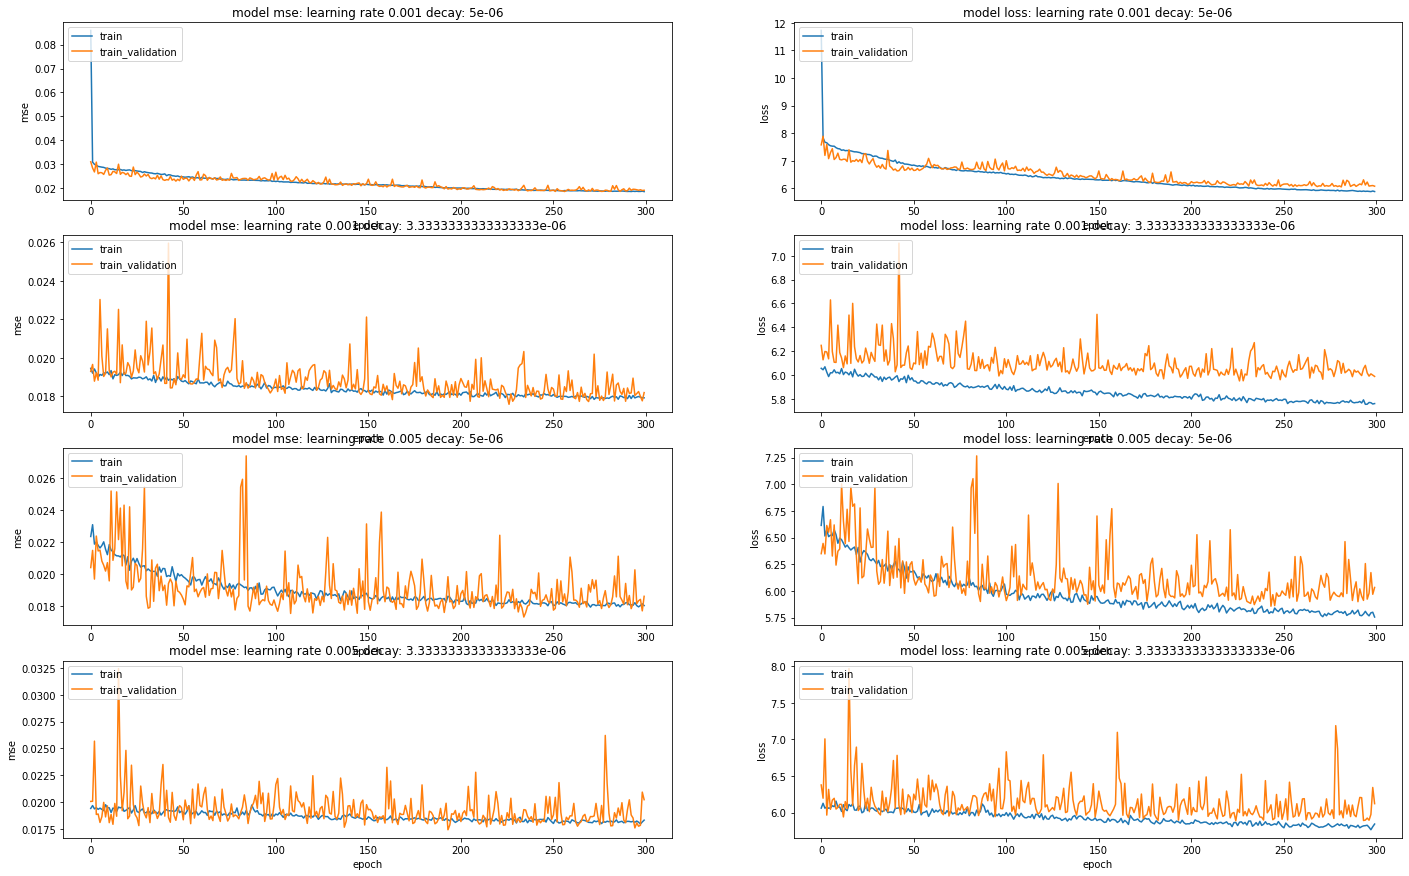

In [ ]:
#Voy a ver como afecta el learning rate and decay parameter en los resultados
learningRate = [0.001, 0.005]
decay= [1e-3/200, 1e-3/300]
neuronas = [10,6,3]
activacion = ["relu","relu","relu"]
#colors = ['r','b','g','k','m','o']
tuned_parameters = {'decay': decay,'learning_rate':learningRate}
model5 = create_mlp3(X_train_transform.shape[1],neuronas,activacion,regress=True)
fig = plt.figure(figsize=(24,15))
n = 0
for l in learningRate:
    for d in decay:
      
      opt = Adam (lr=l,decay=d)
      model5.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
      print("[INFO] training model...")
      history=model5.fit(X_train_transform_train,y_train_transform_train,validation_data=(X_train_transform_validation,y_train_transform_validation),epochs=300,batch_size=8)
      
      # summarize history for accuracy
      n= n+1
      plt.subplot(4,2,n)
      plt.plot(history.history['mse'])
      plt.plot(history.history['val_mse'])
      title_mse = 'model mse: learning rate '+str(l)+' decay: '+str(d)
      plt.title(title_mse)
      plt.ylabel('mse')
      plt.xlabel('epoch')
      plt.legend(['train', 'train_validation'], loc='upper left')
      n = n+1
      plt.subplot(4,2,n)
      # summarize history for loss
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      title_loss = 'model loss: learning rate '+str(l)+' decay: '+str(d)
      plt.title(title_loss)
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'train_validation'], loc='upper left')
plt.show()

Para este modelo con 3 capas y [10,6,3] neuronas, me voy a quedar con un learning rate de 0.001 y un decay de 1e-3/200, ya que aunque con otras opciones parece que se mejoran un poco en train los resultados, parece también que no generalizan muy bien porque la loss función de validación no converge. Todo esto lo podemoss ver con detalle en los gráficos anteriores. También hay que tener en cuenta que en la primera ejecución como no se ha entrenado nunca se ve mejor como la función de pérdida baja, y en el resto como ya han sido preentrenados ese efecto no se ve.

In [ ]:
neuronas = [10,6,3]
activacion = ["relu","relu","relu"]
model4 = create_mlp3(X_train_transform.shape[1],neuronas,activacion,regress=True)
opt = Adam (lr=1e-3,decay=1e-3/200)
model4.compile(loss="mean_absolute_percentage_error",optimizer=opt)
print("[INFO] training model...")
model4.fit(X_train_transform_train,y_train_transform_train,validation_data=(X_train_transform_validation,y_train_transform_validation),epochs=300,batch_size=8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/300
956/956 [==============================] - 2s 2ms/step - loss: 70.9395 - val_loss: 42.3183
Epoch 2/300
956/956 [==============================] - 2s 2ms/step - loss: 22.1276 - val_loss: 14.8753
Epoch 3/300
956/956 [==============================] - 2s 2ms/step - loss: 14.1066 - val_loss: 14.3670
Epoch 4/300
956/956 [==============================] - 2s 2ms/step - loss: 13.8143 - val_loss: 11.6827
Epoch 5/300
956/956 [==============================] - 2s 2ms/step - loss: 9.1622 - val_loss: 8.1707
Epoch 6/300
956/956 [==============================] - 2s 2ms/step - loss: 8.0985 - val_loss: 7.6629
Epoch 7/300
956/956 [==============================] - 2s 2ms/step - loss: 7.8153 - val_loss: 7.5752
Epoch 8/300
956/956 [==============================] - 2s 2ms/step - loss: 7.7178 - val_loss: 7.4296
Epoch 9/300
956/956 [==============================] - 2s 2ms/step - loss: 7.6194 - val_loss: 7.3937
Epoch 10/300
956/956 [==============================] - 2s

In [ ]:
print("Evaluación del modelo en train")
model4.evaluate(X_train_transform_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
model4.evaluate(X_train_transform_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
model4.evaluate(X_test_transform,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**model4.predict(X_train_transform_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model4.predict(X_train_transform_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**model4.predict(X_test_transform ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 0s 1ms/step - loss: 6.4274
Evaluación del modelo en validacion
27/27 [==============================] - 0s 1ms/step - loss: 6.4979
Evaluación del modelo en test
67/67 [==============================] - 0s 1ms/step - loss: 6.9534
RMSE Modelo (train): 33.4
RMSE Modelo (train_validation): 37.4
RMSE Modelo (test) : 35.4


Con el análisis anterior, vemos que los mejores resultados solo con la información númerica, parece que se consigue con el modelo de dos capas con 16 y 20 neuronas,o con 3 capas el modelo [30,25,10] pero tal vez podríamos intentar corregir ese overfitting.

In [ ]:
# make predictions on the testing data [16,20]
import locale
print("[INFO] predicting house prices...")
preds = 10**model2.predict(X_test_transform ).flatten()
testY = 10**y_test

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
 
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(10**y_train.mean(), grouping=True),
	locale.currency(10**y_train.std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $48.75, std house price: $1.93
[INFO] mean: 25.79%, std: 29.31%


Así quedaría el modelo, usando el modelo 3 que tenía dos copas de 10,6 y 3 neuronas, más la capa de salida:

In [ ]:
print("[INFO] predicting house prices...")
preds = 10**model4.predict(X_test_transform ).flatten()
testY = 10**y_test

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
 
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(10**y_train.mean(), grouping=True),
	locale.currency(10**y_train.std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $48.75, std house price: $1.93
[INFO] mean: 26.07%, std: 25.46%


# Image Data

Ahora para ver el efecto de la estimación mediante redes convolucionales, vamos a hacer la prueba estimando el precio a partir de las imagenes simplemente.

En primer lugar, vamos a quedarnos con los conjuntos que train, test y validación que hemos hecho en la parte númerica

In [87]:

import h5py
import tensorflow as tf
#from keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import scipy
from PIL import Image
from scipy import ndimage

In [88]:
X_train_images_train = loaded_images[y_train_transform_train.index]
X_train_images_validation = loaded_images[y_train_transform_validation.index]
X_test_images = loaded_images[y_test.index]

In [89]:
print ("número de muestras para el entrenamiento = " + str(X_train_images_train.shape[0]))
print ("número de muestras para la validacion = " + str(X_train_images_validation.shape[0]))
print ("número de muestras para el test = " + str(X_test_images.shape[0]))



número de muestras para el entrenamiento = 7642
número de muestras para la validacion = 850
número de muestras para el test = 2128


 model 1 : RESCALING   ->  CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED -> SALIDA

In [ ]:
def create_classical_model_1():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [3, 3], activation='relu', input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))   
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
   # model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model

In [ ]:
modelcnn1 = create_classical_model_1()

In [ ]:
lr = 1e-3
decay = 1e-3/200
opt = Adam (learning_rate=lr,decay=decay)
modelcnn1.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])



He tenido que bajar el número de épocas por problemas computacionales.

In [ ]:
modelcnn1.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=100,batch_size=8)

Epoch 1/100
956/956 [==============================] - 32s 22ms/step - loss: 34.1007 - mse: 15.3414 - val_loss: 17.0325 - val_mse: 0.1452
Epoch 2/100
956/956 [==============================] - 21s 22ms/step - loss: 15.6498 - mse: 0.1119 - val_loss: 14.0560 - val_mse: 0.0823
Epoch 3/100
956/956 [==============================] - 21s 21ms/step - loss: 14.4765 - mse: 0.0952 - val_loss: 15.0513 - val_mse: 0.0879
Epoch 4/100
956/956 [==============================] - 21s 21ms/step - loss: 13.7704 - mse: 0.0876 - val_loss: 23.2272 - val_mse: 0.2515
Epoch 5/100
956/956 [==============================] - 21s 22ms/step - loss: 12.9482 - mse: 0.0787 - val_loss: 13.9241 - val_mse: 0.0900
Epoch 6/100
956/956 [==============================] - 21s 22ms/step - loss: 12.4320 - mse: 0.0730 - val_loss: 14.2971 - val_mse: 0.0910
Epoch 7/100
956/956 [==============================] - 21s 22ms/step - loss: 11.8872 - mse: 0.0689 - val_loss: 15.0474 - val_mse: 0.1096
Epoch 8/100
956/956 [===================

In [ ]:
print("Evaluación del modelo en train")
modelcnn1.evaluate(X_train_images_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
modelcnn1.evaluate(X_train_images_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
modelcnn1.evaluate(X_test_images,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**modelcnn1.predict(X_train_images_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**modelcnn1.predict(X_train_images_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**modelcnn1.predict(X_test_images ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 6s 22ms/step - loss: 1.8365 - mse: 0.0037
Evaluación del modelo en validacion
27/27 [==============================] - 1s 36ms/step - loss: 15.8438 - mse: 0.1181
Evaluación del modelo en test
67/67 [==============================] - 2s 24ms/step - loss: 15.4749 - mse: 0.1148
RMSE Modelo (train): 16.2
RMSE Modelo (train_validation): 84.1
RMSE Modelo (test) : 73


El modelo como vemos no generaliza bien, parece que hay mucho overfitting. Vamos a probar en el modelo actual, usar dropout para regularizar.

model 2 : RESCALING   ->  CONV2D -> RELU -> MAXPOOL ->DROPOUT -> FLATTEN -> FULLYCONNECTED -> SALIDA

In [ ]:
#Modelo igual que  create_classical_model_1 pero añadiendo un dropout para ver el efecto
def create_classical_model_2():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [3, 3], activation='relu', input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
    model.add( tf.keras.layers.Dropout(0.5)) 
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model

In [ ]:
modelcnn2 = create_classical_model_2()
lr = 1e-3
decay = 1e-3/200
opt = Adam (learning_rate=lr,decay=decay)
modelcnn2.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
modelcnn2.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=25,batch_size=8)

Epoch 1/25
956/956 [==============================] - 143s 148ms/step - loss: 35.0174 - mse: 47.4146 - val_loss: 13.6913 - val_mse: 0.0918
Epoch 2/25
956/956 [==============================] - 143s 149ms/step - loss: 14.3274 - mse: 0.0945 - val_loss: 13.1083 - val_mse: 0.0712
Epoch 3/25
956/956 [==============================] - 143s 150ms/step - loss: 13.3004 - mse: 0.0812 - val_loss: 12.8781 - val_mse: 0.0706
Epoch 4/25
956/956 [==============================] - 143s 149ms/step - loss: 12.5388 - mse: 0.0737 - val_loss: 14.0450 - val_mse: 0.0771
Epoch 5/25
956/956 [==============================] - 143s 150ms/step - loss: 12.0614 - mse: 0.0701 - val_loss: 14.1896 - val_mse: 0.1016
Epoch 6/25
956/956 [==============================] - 145s 151ms/step - loss: 10.9987 - mse: 0.0600 - val_loss: 15.1679 - val_mse: 0.1180
Epoch 7/25
956/956 [==============================] - 143s 149ms/step - loss: 10.4714 - mse: 0.0555 - val_loss: 14.0750 - val_mse: 0.0993
Epoch 8/25
956/956 [=============

In [ ]:
print("Evaluación del modelo en train")
modelcnn2.evaluate(X_train_images_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
modelcnn2.evaluate(X_train_images_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
modelcnn2.evaluate(X_test_images,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**modelcnn2.predict(X_train_images_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**modelcnn2.predict(X_train_images_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**modelcnn2.predict(X_test_images ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 17s 69ms/step - loss: 7.0345 - mse: 0.0303
Evaluación del modelo en validacion
27/27 [==============================] - 2s 79ms/step - loss: 14.5430 - mse: 0.1020
Evaluación del modelo en test
67/67 [==============================] - 5s 70ms/step - loss: 14.4644 - mse: 0.1039
RMSE Modelo (train): 41.1
RMSE Modelo (train_validation): 60.2
RMSE Modelo (test) : 61.5


Vemos que se corrige parte del overfitting, pero sigue habiendo diferencia entre los resultados de train y validación/test

Vamos a modificar el tamaño del filtro y he movido también dropout

model 3 : RESCALING   ->  CONV2D -> RELU -> MAXPOOL  -> FLATTEN -> FULLYCONNECTED -> DROPOUT -> SALIDA

In [ ]:
def create_classical_model_3():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [5, 5], activation='relu', input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))   
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model

In [ ]:
modelcnn3= create_classical_model_3()
lr = 1e-3
decay = 1e-3/200
opt = Adam (learning_rate=lr,decay=decay)
modelcnn3.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
modelcnn3.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=25,batch_size=8)

Epoch 1/25
956/956 [==============================] - 25s 25ms/step - loss: 52.9594 - mse: 7.7214 - val_loss: 28.2563 - val_mse: 0.3368
Epoch 2/25
956/956 [==============================] - 22s 24ms/step - loss: 23.3159 - mse: 0.2673 - val_loss: 14.1738 - val_mse: 0.0926
Epoch 3/25
956/956 [==============================] - 23s 24ms/step - loss: 14.3347 - mse: 0.0930 - val_loss: 14.3653 - val_mse: 0.0906
Epoch 4/25
956/956 [==============================] - 25s 27ms/step - loss: 14.0557 - mse: 0.0837 - val_loss: 14.3311 - val_mse: 0.0891
Epoch 5/25
956/956 [==============================] - 25s 26ms/step - loss: 14.0542 - mse: 0.0830 - val_loss: 14.3291 - val_mse: 0.0890
Epoch 6/25
956/956 [==============================] - 24s 25ms/step - loss: 14.0508 - mse: 0.0833 - val_loss: 14.3097 - val_mse: 0.0877
Epoch 7/25
956/956 [==============================] - 26s 27ms/step - loss: 14.0509 - mse: 0.0829 - val_loss: 14.3298 - val_mse: 0.0890
Epoch 8/25
956/956 [============================

In [ ]:
print("Evaluación del modelo en train")
modelcnn3.evaluate(X_train_images_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
modelcnn3.evaluate(X_train_images_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
modelcnn3.evaluate(X_test_images,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**modelcnn3.predict(X_train_images_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**modelcnn3.predict(X_train_images_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**modelcnn3.predict(X_test_images ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 6s 21ms/step - loss: 14.0448 - mse: 0.0834
Evaluación del modelo en validacion
27/27 [==============================] - 1s 29ms/step - loss: 14.3304 - mse: 0.0890
Evaluación del modelo en test
67/67 [==============================] - 2s 24ms/step - loss: 14.1450 - mse: 0.0874
RMSE Modelo (train): 53.7
RMSE Modelo (train_validation): 60.6
RMSE Modelo (test) : 59.9


Los resultados empeoran con respecto al modelo 2, al menos en la parte de train, aunque en validación se mantienen.

Incluimos una capa convolucional más, con dropout en ambas para controlar el overfitting.

model 4 : RESCALING   ->  CONV2D  -> RELU -> MAXPOOL -> DROPOUT ->  CONV2D  -> RELU -> MAXPOOL -> DROPOUT -> FLATTEN -> FULLYCONNECTED -> SALIDA

In [ ]:
#Vamos a probar un modelo con dos capas densas y dropout que hemos visto que mejora algo el overfitting
def create_classical_model_4():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [3, 3], activation='relu', input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Conv2D(60, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
    model.add( tf.keras.layers.Dropout(0.5))  
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model


In [ ]:
modelcnn4= create_classical_model_4()
lr = 1e-3
decay = 1e-3/200
opt = Adam (learning_rate=lr,decay=decay)
modelcnn4.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
modelcnn4.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=25,batch_size=8)

Epoch 1/25
956/956 [==============================] - 42s 28ms/step - loss: 75.5330 - mse: 4.5757 - val_loss: 43.0509 - val_mse: 0.6645
Epoch 2/25
956/956 [==============================] - 27s 28ms/step - loss: 22.5361 - mse: 0.2445 - val_loss: 14.8512 - val_mse: 0.1035
Epoch 3/25
956/956 [==============================] - 27s 28ms/step - loss: 14.1069 - mse: 0.0865 - val_loss: 14.3517 - val_mse: 0.0900
Epoch 4/25
956/956 [==============================] - 27s 28ms/step - loss: 14.0514 - mse: 0.0835 - val_loss: 14.3157 - val_mse: 0.0882
Epoch 5/25
956/956 [==============================] - 27s 28ms/step - loss: 14.0500 - mse: 0.0831 - val_loss: 14.3132 - val_mse: 0.0880
Epoch 6/25
956/956 [==============================] - 27s 28ms/step - loss: 14.0503 - mse: 0.0830 - val_loss: 14.3381 - val_mse: 0.0894
Epoch 7/25
956/956 [==============================] - 27s 28ms/step - loss: 14.0511 - mse: 0.0837 - val_loss: 14.3087 - val_mse: 0.0877
Epoch 8/25
956/956 [============================

In [ ]:
print("Evaluación del modelo en train")
modelcnn4.evaluate(X_train_images_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
modelcnn4.evaluate(X_train_images_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
modelcnn4.evaluate(X_test_images,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**modelcnn4.predict(X_train_images_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**modelcnn4.predict(X_train_images_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**modelcnn4.predict(X_test_images ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 7s 26ms/step - loss: 14.0485 - mse: 0.0820
Evaluación del modelo en validacion
27/27 [==============================] - 1s 42ms/step - loss: 14.3014 - mse: 0.0872
Evaluación del modelo en test
67/67 [==============================] - 2s 29ms/step - loss: 14.1291 - mse: 0.0859
RMSE Modelo (train): 53.2
RMSE Modelo (train_validation): 60
RMSE Modelo (test) : 59.4


Los resultados en validación y test no cambian. y los resultados parecen similares al modelo 3.

La extructura del modelo es la misma pero reducimos el número de filtros en las redes convolucionales.

model 5 : RESCALING   ->  CONV2D  -> RELU -> MAXPOOL -> DROPOUT ->  CONV2D  -> RELU -> MAXPOOL -> DROPOUT -> FLATTEN -> FULLYCONNECTED -> SALIDA

In [ ]:
#Con dos capas pero reduciendo el tamaño de las capas
def create_classical_model_5():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(60, [3, 3], activation='relu', input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Conv2D(30, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
    model.add( tf.keras.layers.Dropout(0.5))  
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model

In [ ]:
modelcnn5= create_classical_model_5()
lr = 1e-3
decay = 1e-3/200
opt = Adam (learning_rate=lr,decay=decay)
modelcnn5.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
modelcnn5.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=25,batch_size=8)

Epoch 1/25
956/956 [==============================] - 31s 16ms/step - loss: 18.4902 - mse: 0.8523 - val_loss: 42.0956 - val_mse: 0.6307
Epoch 2/25
956/956 [==============================] - 14s 15ms/step - loss: 14.2701 - mse: 0.0908 - val_loss: 27.7548 - val_mse: 0.3312
Epoch 3/25
956/956 [==============================] - 14s 15ms/step - loss: 14.0606 - mse: 0.0869 - val_loss: 20.1429 - val_mse: 0.2001
Epoch 4/25
956/956 [==============================] - 14s 15ms/step - loss: 13.7196 - mse: 0.0840 - val_loss: 23.7162 - val_mse: 0.2589
Epoch 5/25
956/956 [==============================] - 14s 15ms/step - loss: 13.3774 - mse: 0.0809 - val_loss: 18.7571 - val_mse: 0.1757
Epoch 6/25
956/956 [==============================] - 18s 19ms/step - loss: 12.9067 - mse: 0.0766 - val_loss: 15.3891 - val_mse: 0.1187
Epoch 7/25
956/956 [==============================] - 14s 15ms/step - loss: 12.8870 - mse: 0.0771 - val_loss: 14.6475 - val_mse: 0.1053
Epoch 8/25
956/956 [============================

In [ ]:
print("Evaluación del modelo en train")
modelcnn5.evaluate(X_train_images_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
modelcnn5.evaluate(X_train_images_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
modelcnn5.evaluate(X_test_images,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**modelcnn5.predict(X_train_images_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**modelcnn5.predict(X_train_images_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**modelcnn5.predict(X_test_images ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 4s 13ms/step - loss: 15.3009 - mse: 0.1150
Evaluación del modelo en validacion
27/27 [==============================] - 1s 20ms/step - loss: 17.0284 - mse: 0.1503
Evaluación del modelo en test
67/67 [==============================] - 1s 15ms/step - loss: 16.9095 - mse: 0.1448
RMSE Modelo (train): 57.2
RMSE Modelo (train_validation): 66.1
RMSE Modelo (test) : 65.2


Vemos como empeoran los resultados con respecto al modelo anterior

Vamos a probar otro modelo con otra convolución más: 

model 6 : RESCALING   ->  CONV2D  -> RELU -> MAXPOOL -> DROPOUT ->  CONV2D  -> RELU -> MAXPOOL -> DROPOUT -> CONV2D  -> RELU -> MAXPOOL -> DROPOUT ->FLATTEN -> FULLYCONNECTED -> DROPOUT -> SALIDA

In [ ]:
#Vamos a probar con 3 capas convolucionales
def create_classical_model_6():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [3, 3], activation='relu', input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Conv2D(60, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))    
    model.add( tf.keras.layers.Dropout(0.25))
    model.add( tf.keras.layers.Conv2D(30, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) 
    model.add( tf.keras.layers.Dropout(0.25))
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model

In [ ]:
modelcnn6= create_classical_model_6()
lr = 1e-3
decay = 1e-3/200
opt = Adam (learning_rate=lr,decay=decay)
modelcnn6.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
modelcnn6.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=25,batch_size=8)

Epoch 1/25
956/956 [==============================] - 85s 75ms/step - loss: 42.0642 - mse: 0.8151 - val_loss: 22.7305 - val_mse: 0.2466
Epoch 2/25
956/956 [==============================] - 70s 73ms/step - loss: 22.0004 - mse: 0.2314 - val_loss: 16.1036 - val_mse: 0.1296
Epoch 3/25
956/956 [==============================] - 73s 76ms/step - loss: 14.7226 - mse: 0.0992 - val_loss: 14.3763 - val_mse: 0.0943
Epoch 4/25
956/956 [==============================] - 70s 73ms/step - loss: 13.9553 - mse: 0.0843 - val_loss: 14.0831 - val_mse: 0.0878
Epoch 5/25
956/956 [==============================] - 70s 73ms/step - loss: 13.9766 - mse: 0.0838 - val_loss: 14.3620 - val_mse: 0.0906
Epoch 6/25
956/956 [==============================] - 70s 73ms/step - loss: 14.0524 - mse: 0.0837 - val_loss: 14.3180 - val_mse: 0.0883
Epoch 7/25
956/956 [==============================] - 71s 74ms/step - loss: 14.0462 - mse: 0.0828 - val_loss: 14.3849 - val_mse: 0.0914
Epoch 8/25
956/956 [============================

In [ ]:
print("Evaluación del modelo en train")
modelcnn6.evaluate(X_train_images_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
modelcnn6.evaluate(X_train_images_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
modelcnn6.evaluate(X_test_images,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**modelcnn6.predict(X_train_images_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**modelcnn6.predict(X_train_images_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**modelcnn6.predict(X_test_images ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 23s 90ms/step - loss: 14.0450 - mse: 0.0826
Evaluación del modelo en validacion
27/27 [==============================] - 3s 114ms/step - loss: 14.3135 - mse: 0.0880
Evaluación del modelo en test
67/67 [==============================] - 6s 96ms/step - loss: 14.1362 - mse: 0.0866
RMSE Modelo (train): 53.4
RMSE Modelo (train_validation): 60.3
RMSE Modelo (test) : 59.6


Resultados similares al modelo 4, pero el modelo es más complejo.

El siguiente modelo incluye otra capa FC en la parte final:

model 7 : RESCALING -> CONV2D -> RELU -> MAXPOOL -> DROPOUT -> CONV2D -> RELU -> MAXPOOL -> DROPOUT -> CONV2D -> RELU -> MAXPOOL -> DROPOUT ->FLATTEN -> FULLYCONNECTED -> DROPOUT -> FULLYCONNECTED -> SALIDA

In [ ]:
#Añadimos 3 capas convolucionales y otra densa más
def create_classical_model_7():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [3, 3], activation='relu', input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Conv2D(60, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))    
    model.add( tf.keras.layers.Dropout(0.25))
    model.add( tf.keras.layers.Conv2D(30, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) 
    model.add( tf.keras.layers.Dropout(0.25))
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Dense(4, activation='relu'))
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model


In [ ]:
modelcnn7= create_classical_model_7()
lr = 1e-3
decay = 1e-3/200
opt = Adam (learning_rate=lr,decay=decay)
modelcnn7.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
modelcnn7.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=25,batch_size=8)

Epoch 1/25
956/956 [==============================] - 74s 76ms/step - loss: 27.3634 - mse: 0.3800 - val_loss: 34.7915 - val_mse: 0.4722
Epoch 2/25
956/956 [==============================] - 73s 76ms/step - loss: 14.3122 - mse: 0.0903 - val_loss: 28.4687 - val_mse: 0.3473
Epoch 3/25
956/956 [==============================] - 72s 75ms/step - loss: 13.9934 - mse: 0.0841 - val_loss: 25.5323 - val_mse: 0.2965
Epoch 4/25
956/956 [==============================] - 74s 77ms/step - loss: 14.0287 - mse: 0.0846 - val_loss: 28.7939 - val_mse: 0.3529
Epoch 5/25
956/956 [==============================] - 76s 79ms/step - loss: 13.9642 - mse: 0.0836 - val_loss: 30.6914 - val_mse: 0.3870
Epoch 6/25
956/956 [==============================] - 73s 76ms/step - loss: 13.9185 - mse: 0.0835 - val_loss: 25.6680 - val_mse: 0.2966
Epoch 7/25
956/956 [==============================] - 72s 76ms/step - loss: 13.8778 - mse: 0.0834 - val_loss: 29.3133 - val_mse: 0.3601
Epoch 8/25
956/956 [============================

In [ ]:
print("Evaluación del modelo en train")
modelcnn7.evaluate(X_train_images_train,y_train_transform_train)
print("Evaluación del modelo en validacion")
modelcnn7.evaluate(X_train_images_validation,y_train_transform_validation)
print("Evaluación del modelo en test")
modelcnn7.evaluate(X_test_images,y_test)
mseTrain = mean_squared_error(10**y_train_transform_train,10**modelcnn7.predict(X_train_images_train).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**modelcnn7.predict(X_train_images_validation).flatten())
mseTest = mean_squared_error(10**y_test,10**modelcnn7.predict(X_test_images ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 20s 85ms/step - loss: 25.4212 - mse: 0.2758
Evaluación del modelo en validacion
27/27 [==============================] - 2s 84ms/step - loss: 25.8968 - mse: 0.2951
Evaluación del modelo en test
67/67 [==============================] - 6s 84ms/step - loss: 25.7283 - mse: 0.2887
RMSE Modelo (train): 66.4
RMSE Modelo (train_validation): 73.2
RMSE Modelo (test) : 72.3


El modelo 7 obtiene peores resultados, que el modelo 6. También el modelo 5 obtiene resultados ligeramente peores que el 6.El modelo 6 obtiene resultados similares al modelo 4, aunque este último es más sencillo. El modelo 1 tiene mucho overfitting. El modelo 2 corrige parte de ese overfitting.Aunque sigue habiendo mucha diferencia entre validación y train. El modelo 3 es similar al modelo 4.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/25
956/956 [==============================] - 87s 77ms/step - loss: 72.3598 - mse: 1.9374 - val_loss: 42.7489 - val_mse: 0.6569
Epoch 2/25
956/956 [==============================] - 73s 76ms/step - loss: 22.5933 - mse: 0.2447 - val_loss: 14.9619 - val_mse: 0.1062
Epoch 3/25
956/956 [==============================] - 72s 75ms/step - loss: 14.1233 - mse: 0.0870 - val_loss: 14.3493 - val_mse: 0.0899
Epoch 4/25
956/956 [==============================] - 72s 76ms/step - loss: 14.0531 - mse: 0.0834 - val_loss: 14.3400 - val_mse: 0.0895
Epoch 5/25
956/956 [==============================] - 75s 78ms/step - loss: 14.0521 - mse: 0.0833 - val_loss: 14.3349 - val_mse: 0.0893
Epoch 6/25
956/956 [==============================] - 72s 76ms/step - loss: 14.0516 - mse: 0.0829 - val_loss: 14.3683 - val_mse: 0.0908
Epoch 7/25
956/956 [==============================] - 72s 76ms/step - loss: 14.0525 - mse: 0.0837 - val_loss: 14.3241 - val_mse: 0.0887
Epoch 8/25
956/956 [===

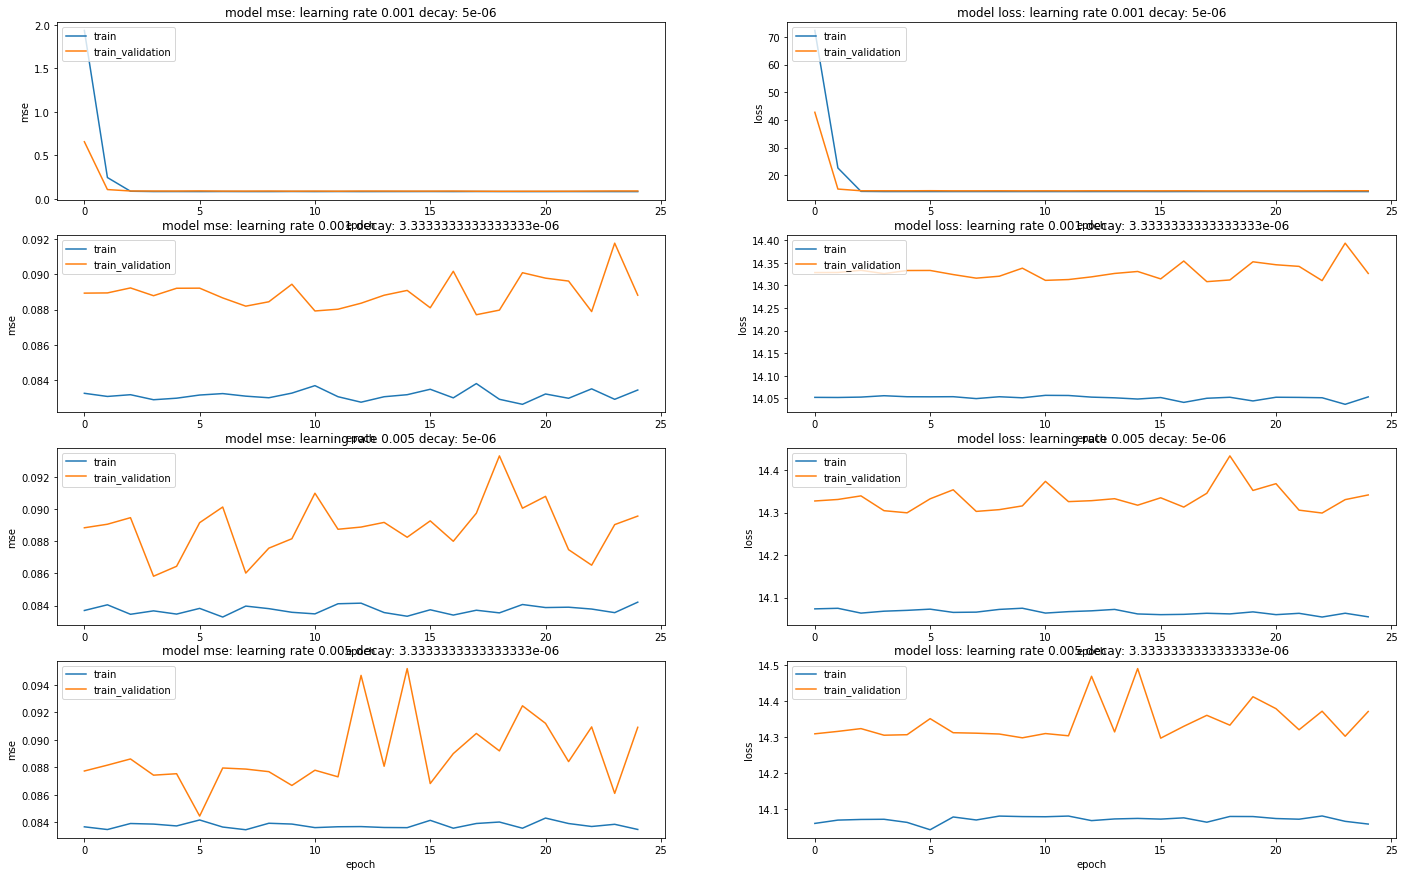

In [ ]:
#Tomando como referencial el modelo 4 vamos a ver el efecto del learning rate y el decay del optimizador Adam para ver el impacto en los resultados
learningRate = [0.001, 0.005]
decay= [1e-3/200, 1e-3/300]

tuned_parameters = {'decay': decay,'learning_rate':learningRate}
modelcnn4= create_classical_model_4()
fig = plt.figure(figsize=(24,15))
n = 0
for l in learningRate:
    for d in decay:
      
      opt = Adam (lr=l,decay=d)
      modelcnn4.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
      print("[INFO] training model...")
      history=modelcnn4.fit(X_train_images_train ,y_train_transform_train,validation_data=(X_train_images_validation,y_train_transform_validation),epochs=25,batch_size=8)
      
      # summarize history for accuracy
      n= n+1
      plt.subplot(4,2,n)
      plt.plot(history.history['mse'])
      plt.plot(history.history['val_mse'])
      title_mse = 'model mse: learning rate '+str(l)+' decay: '+str(d)
      plt.title(title_mse)
      plt.ylabel('mse')
      plt.xlabel('epoch')
      plt.legend(['train', 'train_validation'], loc='upper left')
      n = n+1
      plt.subplot(4,2,n)
      # summarize history for loss
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      title_loss = 'model loss: learning rate '+str(l)+' decay: '+str(d)
      plt.title(title_loss)
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'train_validation'], loc='upper left')
plt.show()

En la primera opción que ejecuta, parece que se reduce mucho la función de pérdias, pero el resto ya no convergen, parece que como el modelo está ya entrenado el resto de ejecuciones no consiguen disminuir más la función de pérdidas.

In [ ]:
# make predictions on the testing data
import locale
print("[INFO] predicting house prices...")
preds = 10**modelcnn4.predict(X_test_images ).flatten()
testY = 10**y_test

# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
 
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(10**y_train.mean(), grouping=True),
	locale.currency(10**y_train.std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $48.75, std house price: $1.93
[INFO] mean: 52.33%, std: 44.24%


# Concatenate

Ahora vamos a hacer modelos con ambas ramas. Para empezar vamos a tomar como base el modelo con 3 neuronas en la parte númerica, y el modelo 4 de la parte de las convolucionales. Posteriormente usaremos un modelo en la parte númerica de dos capas, que hemos visto en la primera parte que estimaba mejor el precio. 

In [90]:
from keras.layers import concatenate

In [ ]:
def model_mlp (dim,neuronas,activacion,regress = False):
  model = Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(dim,)))
  model.add(Dense(neuronas[0],activation=activacion[0]))
  model.add(Dense(neuronas[1], activation=activacion[1]))
  model.add(Dense(neuronas[2], activation=activacion[2]))
  if regress:
    model.add(Dense(1, activation="linear"))
  
  return model

In [ ]:
def model_cnn ():
      # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Conv2D(60, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
    model.add( tf.keras.layers.Dropout(0.5))  
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    model.add( tf.keras.layers.Dense(1, activation='linear'))
    return model


In [ ]:

lr = 1e-3
decay = 1e-3/200
neuronas = [10,6,3]
activacion = ["relu","relu","relu"]
opt = Adam (learning_rate=lr,decay=decay)
mlp = model_mlp(X_train_transform.shape[1],neuronas,activacion,regress=True)
cnn = model_cnn()
combinado = concatenate([mlp.output, cnn.output])
x = Dense(4, activation="relu")(combinado)
x = Dense(1, activation="linear")(x)
model_combinado1 = Model(inputs=[mlp.input, cnn.input], outputs=x)
model_combinado1.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])

In [ ]:
model_combinado1.fit([X_train_transform_train, X_train_images_train], y_train_transform_train,validation_data=([X_train_transform_validation, X_train_images_validation], y_train_transform_validation),epochs=25, batch_size=8)

Epoch 1/25
956/956 [==============================] - 42s 29ms/step - loss: 13.3973 - mse: 0.0911 - val_loss: 9.1124 - val_mse: 0.0441
Epoch 2/25
956/956 [==============================] - 26s 28ms/step - loss: 8.2779 - mse: 0.0339 - val_loss: 7.4139 - val_mse: 0.0296
Epoch 3/25
956/956 [==============================] - 26s 28ms/step - loss: 7.9245 - mse: 0.0317 - val_loss: 7.2148 - val_mse: 0.0270
Epoch 4/25
956/956 [==============================] - 27s 28ms/step - loss: 7.7725 - mse: 0.0308 - val_loss: 7.1030 - val_mse: 0.0268
Epoch 5/25
956/956 [==============================] - 27s 28ms/step - loss: 7.6730 - mse: 0.0299 - val_loss: 7.1072 - val_mse: 0.0267
Epoch 6/25
956/956 [==============================] - 27s 28ms/step - loss: 7.5073 - mse: 0.0288 - val_loss: 7.0957 - val_mse: 0.0260
Epoch 7/25
956/956 [==============================] - 27s 28ms/step - loss: 7.5300 - mse: 0.0293 - val_loss: 7.3737 - val_mse: 0.0300
Epoch 8/25
956/956 [==============================] - 27s 28m

In [ ]:
print("Evaluación del modelo en train")
model_combinado1.evaluate([X_train_transform_train, X_train_images_train],y_train_transform_train)
print("Evaluación del modelo en validacion")
model_combinado1.evaluate([X_train_transform_validation, X_train_images_validation],y_train_transform_validation)
print("Evaluación del modelo en test")
model_combinado1.evaluate( [X_test_transform,X_test_images],y_test)

mseTrain = mean_squared_error(10**y_train_transform_train,10**model_combinado1.predict([X_train_transform_train, X_train_images_train]).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model_combinado1.predict([X_train_transform_validation, X_train_images_validation]).flatten())
mseTest = mean_squared_error(10**y_test,10**model_combinado1.predict([X_test_transform,X_test_images] ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 7s 26ms/step - loss: 6.1258 - mse: 0.0213
Evaluación del modelo en validacion
27/27 [==============================] - 1s 45ms/step - loss: 7.9907 - mse: 0.0345
Evaluación del modelo en test
67/67 [==============================] - 2s 30ms/step - loss: 8.4159 - mse: 0.0360
RMSE Modelo (train): 34.2
RMSE Modelo (train_validation): 42.9
RMSE Modelo (test) : 42.5


Parece que no se consigue mejorar el modelo simple que usa solo los datos númericos.

In [ ]:
#Vamos a eliminar de los modelos mlp y cnn la última cama que era la capa final para la estimación del precio

In [141]:
def model_mlp2 (dim,neuronas,activacion):
  model = Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(dim,)))
  model.add(Dense(neuronas[0],activation=activacion[0]))
  model.add(Dense(neuronas[1], activation=activacion[1]))
  model.add(Dense(neuronas[2], activation=activacion[2]))
  return model

def model_cnn2 ():
      # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model =Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(224, 224, 3)))
    model.add( tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    model.add( tf.keras.layers.Conv2D(120, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( tf.keras.layers.Dropout(0.5))
    model.add( tf.keras.layers.Conv2D(60, [3, 3], activation='relu'))
    model.add( tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
    model.add( tf.keras.layers.Dropout(0.5))  
    model.add( tf.keras.layers.Flatten())
    model.add( tf.keras.layers.Dense(16, activation='relu'))
    return model


In [ ]:
lr = 1e-3
decay = 1e-3/200
neuronas = [10,6,3]
activacion = ["relu","relu","relu"]
opt = Adam (learning_rate=lr,decay=decay)
mlp2 = model_mlp2(X_train_transform.shape[1],neuronas,activacion)
cnn2 = model_cnn2()
combinado2 = concatenate([mlp2.output, cnn2.output])
x = Dense(4, activation="relu")(combinado2)
x = Dense(1, activation="linear")(x)
model_combinado2 = Model(inputs=[mlp2.input, cnn2.input], outputs=x)
model_combinado2.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
model_combinado2.fit([X_train_transform_train, X_train_images_train], y_train_transform_train,validation_data=([X_train_transform_validation, X_train_images_validation], y_train_transform_validation),epochs=25, batch_size=8)

Epoch 1/25
956/956 [==============================] - 29s 29ms/step - loss: 72.8409 - mse: 2.2095 - val_loss: 42.8378 - val_mse: 0.6591
Epoch 2/25
956/956 [==============================] - 27s 28ms/step - loss: 22.5352 - mse: 0.2451 - val_loss: 14.8896 - val_mse: 0.1044
Epoch 3/25
956/956 [==============================] - 28s 29ms/step - loss: 14.0942 - mse: 0.0866 - val_loss: 14.3276 - val_mse: 0.0889
Epoch 4/25
956/956 [==============================] - 27s 29ms/step - loss: 14.0523 - mse: 0.0833 - val_loss: 14.3230 - val_mse: 0.0886
Epoch 5/25
956/956 [==============================] - 27s 28ms/step - loss: 14.0429 - mse: 0.0835 - val_loss: 14.2967 - val_mse: 0.0868
Epoch 6/25
956/956 [==============================] - 27s 28ms/step - loss: 14.0511 - mse: 0.0825 - val_loss: 14.3351 - val_mse: 0.0893
Epoch 7/25
956/956 [==============================] - 27s 29ms/step - loss: 14.0513 - mse: 0.0834 - val_loss: 14.3205 - val_mse: 0.0884
Epoch 8/25
956/956 [============================

In [ ]:
print("Evaluación del modelo en train")
model_combinado2.evaluate([X_train_transform_train, X_train_images_train],y_train_transform_train)
print("Evaluación del modelo en validacion")
model_combinado2.evaluate([X_train_transform_validation, X_train_images_validation],y_train_transform_validation)
print("Evaluación del modelo en test")
model_combinado2.evaluate( [X_test_transform,X_test_images],y_test)

mseTrain = mean_squared_error(10**y_train_transform_train,10**model_combinado2.predict([X_train_transform_train, X_train_images_train]).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model_combinado2.predict([X_train_transform_validation, X_train_images_validation]).flatten())
mseTest = mean_squared_error(10**y_test,10**model_combinado2.predict([X_test_transform,X_test_images] ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 6s 24ms/step - loss: 14.0452 - mse: 0.0825
Evaluación del modelo en validacion
27/27 [==============================] - 1s 26ms/step - loss: 14.3104 - mse: 0.0879
Evaluación del modelo en test
67/67 [==============================] - 2s 23ms/step - loss: 14.1347 - mse: 0.0864
RMSE Modelo (train): 53.4
RMSE Modelo (train_validation): 60.3
RMSE Modelo (test) : 59.6


Obtenemos peores resultados que el modelo anterior.

In [ ]:
#Vamos a añadir más neuronas en las FC una vez concatenado

In [ ]:
lr = 1e-3
decay = 1e-3/200
neuronas = [10,6,3]
activacion = ["relu","relu","relu"]
opt = Adam (learning_rate=lr,decay=decay)
mlp2 = model_mlp2(X_train_transform.shape[1],neuronas,activacion)
cnn2 = model_cnn2()
combinado2 = concatenate([mlp2.output, cnn2.output])
x = Dense(20, activation="relu")(combinado2)
x = Dense(1, activation="linear")(x)
model_combinado3 = Model(inputs=[mlp2.input, cnn2.input], outputs=x)
model_combinado3.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
model_combinado3.fit([X_train_transform_train, X_train_images_train], y_train_transform_train,validation_data=([X_train_transform_validation, X_train_images_validation], y_train_transform_validation),epochs=25, batch_size=8)

Epoch 1/25
956/956 [==============================] - 38s 28ms/step - loss: 14.7221 - mse: 0.1205 - val_loss: 12.4947 - val_mse: 0.0723
Epoch 2/25
956/956 [==============================] - 27s 28ms/step - loss: 8.1135 - mse: 0.0329 - val_loss: 10.3544 - val_mse: 0.0523
Epoch 3/25
956/956 [==============================] - 27s 29ms/step - loss: 7.8386 - mse: 0.0307 - val_loss: 8.8137 - val_mse: 0.0416
Epoch 4/25
956/956 [==============================] - 27s 28ms/step - loss: 7.7133 - mse: 0.0302 - val_loss: 7.3634 - val_mse: 0.0268
Epoch 5/25
956/956 [==============================] - 27s 28ms/step - loss: 7.7728 - mse: 0.0306 - val_loss: 7.1540 - val_mse: 0.0272
Epoch 6/25
956/956 [==============================] - 27s 28ms/step - loss: 7.5331 - mse: 0.0290 - val_loss: 8.1389 - val_mse: 0.0354
Epoch 7/25
956/956 [==============================] - 27s 28ms/step - loss: 7.5289 - mse: 0.0288 - val_loss: 7.1154 - val_mse: 0.0265
Epoch 8/25
956/956 [==============================] - 27s 2

In [ ]:
print("Evaluación del modelo en train")
model_combinado3.evaluate([X_train_transform_train, X_train_images_train],y_train_transform_train)
print("Evaluación del modelo en validacion")
model_combinado3.evaluate([X_train_transform_validation, X_train_images_validation],y_train_transform_validation)
print("Evaluación del modelo en test")
model_combinado3.evaluate( [X_test_transform,X_test_images],y_test)

mseTrain = mean_squared_error(10**y_train_transform_train,10**model_combinado3.predict([X_train_transform_train, X_train_images_train]).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model_combinado3.predict([X_train_transform_validation, X_train_images_validation]).flatten())
mseTest = mean_squared_error(10**y_test,10**model_combinado3.predict([X_test_transform,X_test_images] ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 8s 29ms/step - loss: 5.2699 - mse: 0.0173
Evaluación del modelo en validacion
27/27 [==============================] - 1s 48ms/step - loss: 7.2559 - mse: 0.0279
Evaluación del modelo en test
67/67 [==============================] - 2s 30ms/step - loss: 7.6213 - mse: 0.0289
RMSE Modelo (train): 29.7
RMSE Modelo (train_validation): 38
RMSE Modelo (test) : 36.1


Parece que conseguimos mejorar los resultados de los modelos combinados, pero no hemos mejorado el modelo sencillo FC de la parte númerica.

In [ ]:
#Vamos a incluir dropout para controlar posible overfitting

In [ ]:
lr = 1e-3
decay = 1e-3/200
neuronas = [10,6,3]
activacion = ["relu","relu","relu"]
opt = Adam (learning_rate=lr,decay=decay)
mlp2 = model_mlp2(X_train_transform.shape[1],neuronas,activacion)
cnn2 = model_cnn2()
combinado2 = concatenate([mlp2.output, cnn2.output])
x = Dense(20, activation="relu")(combinado2)
x = Dropout(0.2)(x)
x = Dense(1, activation="linear")(x)
model_combinado4 = Model(inputs=[mlp2.input, cnn2.input], outputs=x)
model_combinado4.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
model_combinado4.fit([X_train_transform_train, X_train_images_train], y_train_transform_train,validation_data=([X_train_transform_validation, X_train_images_validation], y_train_transform_validation),epochs=50, batch_size=8)

Epoch 1/50
956/956 [==============================] - 41s 28ms/step - loss: 22.0624 - mse: 0.6864 - val_loss: 9.8952 - val_mse: 0.0491
Epoch 2/50
956/956 [==============================] - 26s 28ms/step - loss: 14.2662 - mse: 0.0959 - val_loss: 8.0981 - val_mse: 0.0347
Epoch 3/50
956/956 [==============================] - 26s 28ms/step - loss: 11.9743 - mse: 0.0701 - val_loss: 9.0402 - val_mse: 0.0427
Epoch 4/50
956/956 [==============================] - 26s 28ms/step - loss: 10.3792 - mse: 0.0539 - val_loss: 7.3591 - val_mse: 0.0280
Epoch 5/50
956/956 [==============================] - 26s 28ms/step - loss: 9.5105 - mse: 0.0445 - val_loss: 8.4627 - val_mse: 0.0366
Epoch 6/50
956/956 [==============================] - 27s 28ms/step - loss: 8.7331 - mse: 0.0382 - val_loss: 7.6639 - val_mse: 0.0304
Epoch 7/50
956/956 [==============================] - 27s 28ms/step - loss: 8.3771 - mse: 0.0353 - val_loss: 7.2940 - val_mse: 0.0260
Epoch 8/50
956/956 [==============================] - 27s 

In [ ]:
print("Evaluación del modelo en train")
model_combinado4.evaluate([X_train_transform_train, X_train_images_train],y_train_transform_train)
print("Evaluación del modelo en validacion")
model_combinado4.evaluate([X_train_transform_validation, X_train_images_validation],y_train_transform_validation)
print("Evaluación del modelo en test")
model_combinado4.evaluate( [X_test_transform,X_test_images],y_test)

mseTrain = mean_squared_error(10**y_train_transform_train,10**model_combinado4.predict([X_train_transform_train, X_train_images_train]).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model_combinado4.predict([X_train_transform_validation, X_train_images_validation]).flatten())
mseTest = mean_squared_error(10**y_test,10**model_combinado4.predict([X_test_transform,X_test_images] ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 7s 26ms/step - loss: 6.9292 - mse: 0.0242
Evaluación del modelo en validacion
27/27 [==============================] - 1s 42ms/step - loss: 6.7627 - mse: 0.0226
Evaluación del modelo en test
67/67 [==============================] - 2s 30ms/step - loss: 7.0138 - mse: 0.0238
RMSE Modelo (train): 33.7
RMSE Modelo (train_validation): 35.7
RMSE Modelo (test) : 34.8


Con este modelo, al meter capas dropout y controlar el overfitting parece que train y validación/test consiguen resultados similares. Pero sigue siendo peor que el modelo sencillo FC de datos númericos.

In [ ]:
lr = 1e-3
decay = 1e-3/200
neuronas = [10,6,3]
activacion = ["relu","relu","relu"]
opt = Adam (learning_rate=lr,decay=decay)
mlp2 = model_mlp2(X_train_transform.shape[1],neuronas,activacion)
cnn2 = model_cnn2()
combinado2 = concatenate([mlp2.output, cnn2.output])
x = Dense(30, activation="relu")(combinado2)
x = Dropout(0.2)(x)
x = Dense(1, activation="linear")(x)
model_combinado5 = Model(inputs=[mlp2.input, cnn2.input], outputs=x)
model_combinado5.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
model_combinado5.fit([X_train_transform_train, X_train_images_train], y_train_transform_train,validation_data=([X_train_transform_validation, X_train_images_validation], y_train_transform_validation),epochs=50, batch_size=8)

Epoch 1/50
956/956 [==============================] - 42s 28ms/step - loss: 21.0453 - mse: 0.2971 - val_loss: 11.9605 - val_mse: 0.0668
Epoch 2/50
956/956 [==============================] - 26s 27ms/step - loss: 12.4405 - mse: 0.0730 - val_loss: 7.7794 - val_mse: 0.0319
Epoch 3/50
956/956 [==============================] - 26s 28ms/step - loss: 11.0740 - mse: 0.0588 - val_loss: 7.3822 - val_mse: 0.0285
Epoch 4/50
956/956 [==============================] - 26s 28ms/step - loss: 10.0626 - mse: 0.0493 - val_loss: 7.6428 - val_mse: 0.0302
Epoch 5/50
956/956 [==============================] - 27s 28ms/step - loss: 9.4185 - mse: 0.0432 - val_loss: 7.4515 - val_mse: 0.0292
Epoch 6/50
956/956 [==============================] - 27s 28ms/step - loss: 8.7746 - mse: 0.0382 - val_loss: 7.4464 - val_mse: 0.0289
Epoch 7/50
956/956 [==============================] - 27s 28ms/step - loss: 8.4951 - mse: 0.0363 - val_loss: 7.3391 - val_mse: 0.0270
Epoch 8/50
956/956 [==============================] - 27s

In [ ]:
print("Evaluación del modelo en train")
model_combinado5.evaluate([X_train_transform_train, X_train_images_train],y_train_transform_train)
print("Evaluación del modelo en validacion")
model_combinado5.evaluate([X_train_transform_validation, X_train_images_validation],y_train_transform_validation)
print("Evaluación del modelo en test")
model_combinado5.evaluate( [X_test_transform,X_test_images],y_test)

mseTrain = mean_squared_error(10**y_train_transform_train,10**model_combinado5.predict([X_train_transform_train, X_train_images_train]).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model_combinado5.predict([X_train_transform_validation, X_train_images_validation]).flatten())
mseTest = mean_squared_error(10**y_test,10**model_combinado5.predict([X_test_transform,X_test_images] ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 7s 26ms/step - loss: 6.8159 - mse: 0.0241
Evaluación del modelo en validacion
27/27 [==============================] - 1s 44ms/step - loss: 6.7545 - mse: 0.0241
Evaluación del modelo en test
67/67 [==============================] - 2s 29ms/step - loss: 7.1825 - mse: 0.0253
RMSE Modelo (train): 34.2
RMSE Modelo (train_validation): 37.1
RMSE Modelo (test) : 34.5


El modelo obtiene peores resultados que el modelo combinado 4

Vamos a probar si usando un mlp más sencillo podemos mejorar los resultados que teníamos cuando no usabamos las imagenes.

In [ ]:
#Voy a probar con un modelo más sencillo, en la parte de información númerica con dos capas de 16 y 20 neuronas que era el modelo más estable anterior

In [91]:
def model_mlp3 (dim,neuronas,activacion):
  model = Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(dim,)))
  model.add(Dense(neuronas[0],activation=activacion[0]))
  model.add(Dense(neuronas[1], activation=activacion[1]))
  return model

In [ ]:
lr = 1e-3
decay = 1e-3/200
neuronas = [16,20]
activacion = ["relu","relu","relu"]
opt = Adam (learning_rate=lr,decay=decay)
mlp3 = model_mlp3(X_train_transform.shape[1],neuronas,activacion)
cnn2 = model_cnn2()
combinado3 = concatenate([mlp3.output, cnn2.output])
x = Dense(20, activation="relu")(combinado3)
x = Dropout(0.2)(x)
x = Dense(1, activation="linear")(x)
model_combinado6 = Model(inputs=[mlp3.input, cnn2.input], outputs=x)
model_combinado6.compile(loss="mean_absolute_percentage_error",optimizer=opt,metrics=['mse'])
model_combinado6.fit([X_train_transform_train, X_train_images_train], y_train_transform_train,validation_data=([X_train_transform_validation, X_train_images_validation], y_train_transform_validation),epochs=50, batch_size=8)

Epoch 1/50
956/956 [==============================] - 86s 79ms/step - loss: 21.4304 - mse: 0.2667 - val_loss: 13.7776 - val_mse: 0.0830
Epoch 2/50
956/956 [==============================] - 73s 76ms/step - loss: 14.2274 - mse: 0.0968 - val_loss: 8.1339 - val_mse: 0.0340
Epoch 3/50
956/956 [==============================] - 72s 75ms/step - loss: 11.9659 - mse: 0.0702 - val_loss: 7.2107 - val_mse: 0.0266
Epoch 4/50
956/956 [==============================] - 71s 75ms/step - loss: 10.1302 - mse: 0.0514 - val_loss: 7.4817 - val_mse: 0.0261
Epoch 5/50
956/956 [==============================] - 72s 75ms/step - loss: 9.2851 - mse: 0.0430 - val_loss: 7.2291 - val_mse: 0.0258
Epoch 6/50
956/956 [==============================] - 72s 75ms/step - loss: 8.6859 - mse: 0.0381 - val_loss: 7.1214 - val_mse: 0.0252
Epoch 7/50
956/956 [==============================] - 73s 76ms/step - loss: 8.3197 - mse: 0.0346 - val_loss: 7.1172 - val_mse: 0.0260
Epoch 8/50
956/956 [==============================] - 72s

In [ ]:
print("Evaluación del modelo en train")
model_combinado6.evaluate([X_train_transform_train, X_train_images_train],y_train_transform_train)
print("Evaluación del modelo en validacion")
model_combinado6.evaluate([X_train_transform_validation, X_train_images_validation],y_train_transform_validation)
print("Evaluación del modelo en test")
model_combinado6.evaluate( [X_test_transform,X_test_images],y_test)

mseTrain = mean_squared_error(10**y_train_transform_train,10**model_combinado6.predict([X_train_transform_train, X_train_images_train]).flatten())
mseTrainvalidation = mean_squared_error(10**y_train_transform_validation,10**model_combinado6.predict([X_train_transform_validation, X_train_images_validation]).flatten())
mseTest = mean_squared_error(10**y_test,10**model_combinado6.predict([X_test_transform,X_test_images] ).flatten())

print('RMSE Modelo (train): %0.3g' % np.sqrt(mseTrain))
print('RMSE Modelo (train_validation): %0.3g' % np.sqrt(mseTrainvalidation))
print('RMSE Modelo (test) : %0.3g' % np.sqrt(mseTest))

Evaluación del modelo en train
239/239 [==============================] - 22s 86ms/step - loss: 5.9793 - mse: 0.0208
Evaluación del modelo en validacion
27/27 [==============================] - 3s 110ms/step - loss: 7.0959 - mse: 0.0256
Evaluación del modelo en test
67/67 [==============================] - 6s 88ms/step - loss: 7.3756 - mse: 0.0272
RMSE Modelo (train): 33.5
RMSE Modelo (train_validation): 39.7
RMSE Modelo (test) : 37.5


De esta forma, vemos que no mejoramos los resultados, tal vez con más epocas podríamos ajustar más, ya que es cierto que para la parte númerica el número de épocas utilizado era 300 y aquí nos quedamos simplemente en 50, por tiempo de entrenamiento. Por otro lado, tal vez sustituyendo dropout por BatchNormalization podría ayudar a converger más rápidamente. Lo cierto es que he intentado entrenar un podelo combinado con 300 épocas sustituyendo los dropout, pero los tiempos de entrenamiento eran demasiado largos y finalmente se desconectaba colab.

De los modelos combinados, nos quedaríamos con el 4 ya que tiene buenos resultados y además son similares entre train y validación.